In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.api import VARMAX
import scipy.stats as stats
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
def analyze_series(series, column_name):
    print(f"Analyzing {column_name} series")
    
    adf_result = adfuller(series.dropna())
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    
    # Plotting ACF and PACF
    fig, axs = plt.subplots(2, 1, figsize=(14, 10))
    
    # ACF plot
    
    plot_acf(series.dropna(), lags=360, ax=axs[0], color='b') # lag is 360 to represent 1 year
    axs[0].set_title(f'Autocorrelation Function (ACF) for {column_name}')
    axs[0].set_xticks(np.arange(0, 361,10))  # Add X-axis labels
    axs[0].grid(True)
    
    # PACF plot
    plot_pacf(series.dropna(), lags=360, ax=axs[1], method='ywm', color='r',marker='.') # Use 'ywm' method to avoid warning
    axs[1].set_title(f'Partial Autocorrelation Function (PACF) for {column_name}')
    axs[1].set_xticks(np.arange(0, 361, 10))
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

In [4]:
data=pd.read_csv(r"C:\Users\USER\OneDrive - Amrita Vishwa Vidyapeetham\Documents\programing\python\tag\sem5\nasa_power_data_combined.csv")
df_main=data

In [5]:
data1=data[data['Date']>=20010101]
data1.shape

(16802, 35)

In [6]:
d1=data1.drop('Date',axis=1)
d1=d1.drop('Latitude',axis=1)
d1=d1.drop('Longitude',axis=1)

Analyzing ALLSKY_SFC_LW_DWN series
ADF Statistic: -3.6798338189634134
p-value: 0.004405918941651245


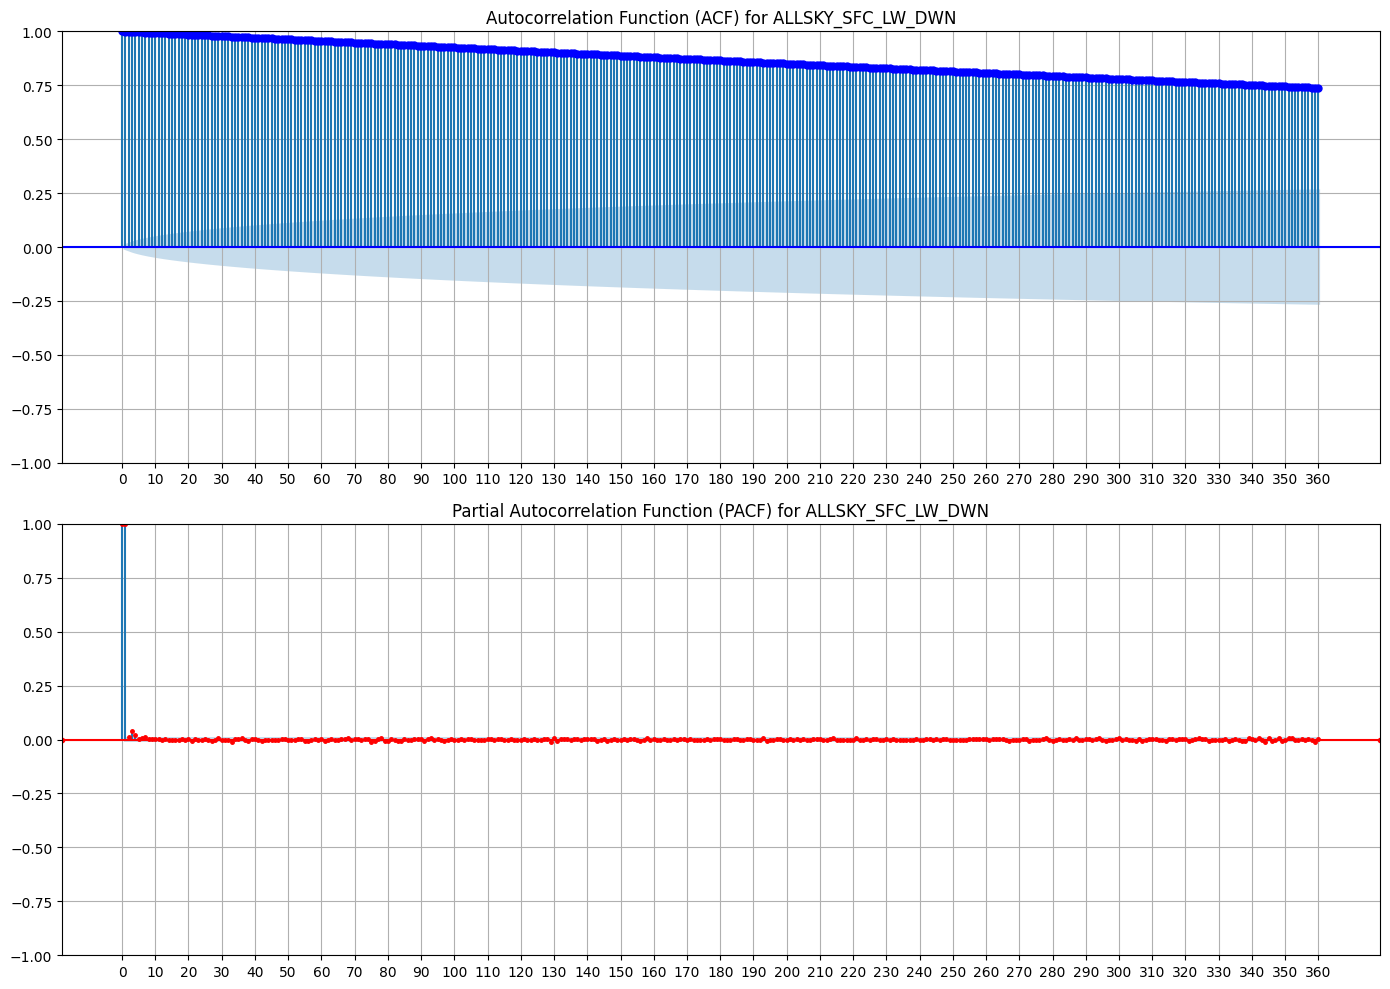

Analyzing CLRSKY_SFC_LW_DWN series
ADF Statistic: -3.847522067965564
p-value: 0.0024568582183357155


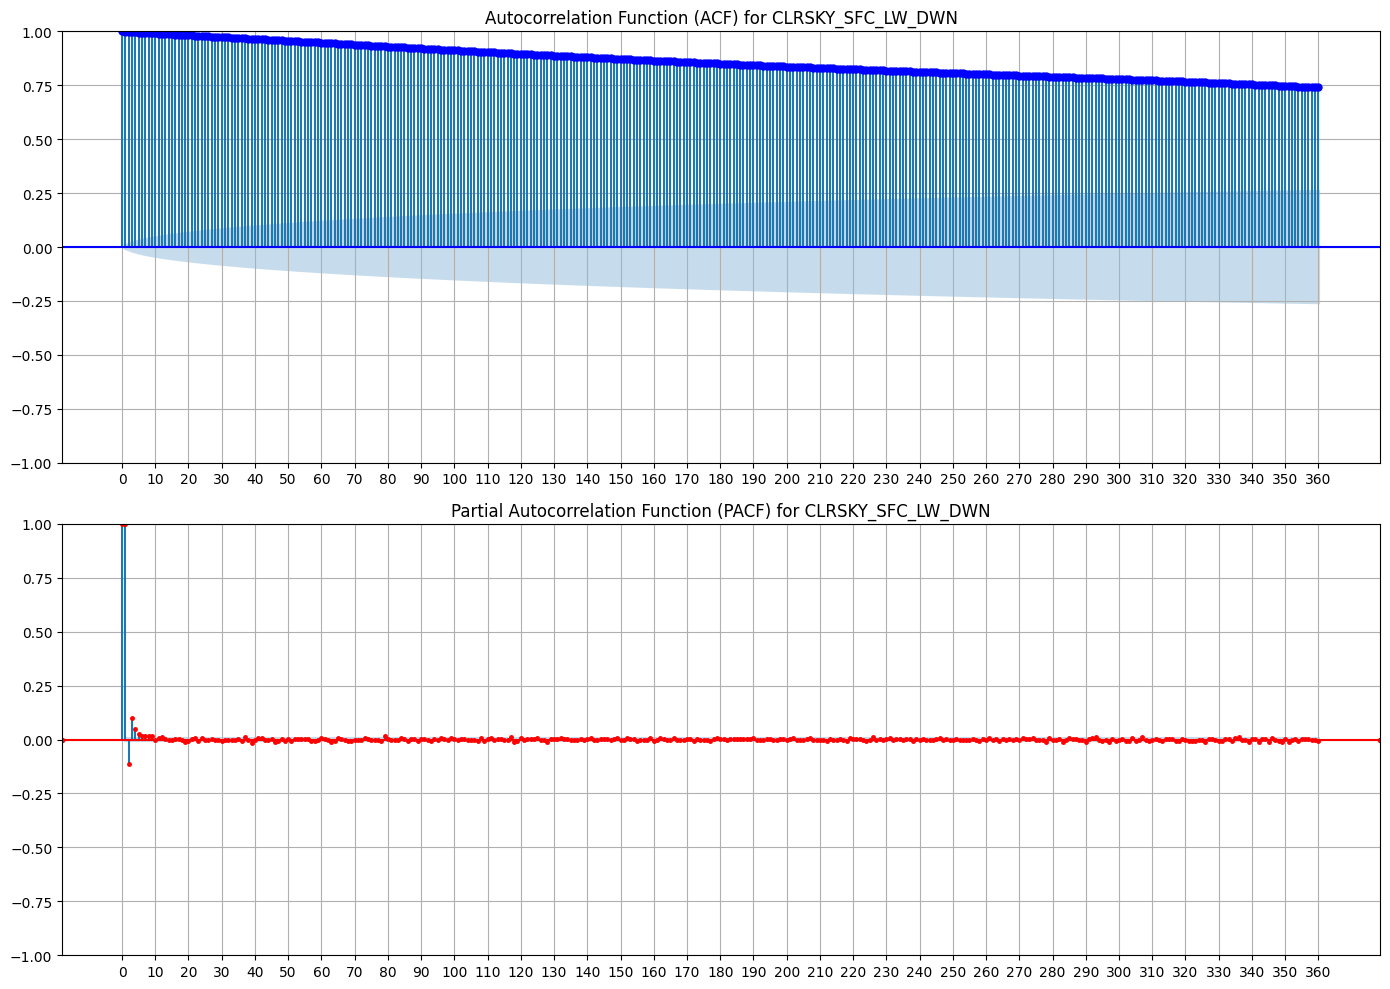

Analyzing ALLSKY_SFC_SW_DNI series
ADF Statistic: -1.8597139821735076
p-value: 0.35124363572073014


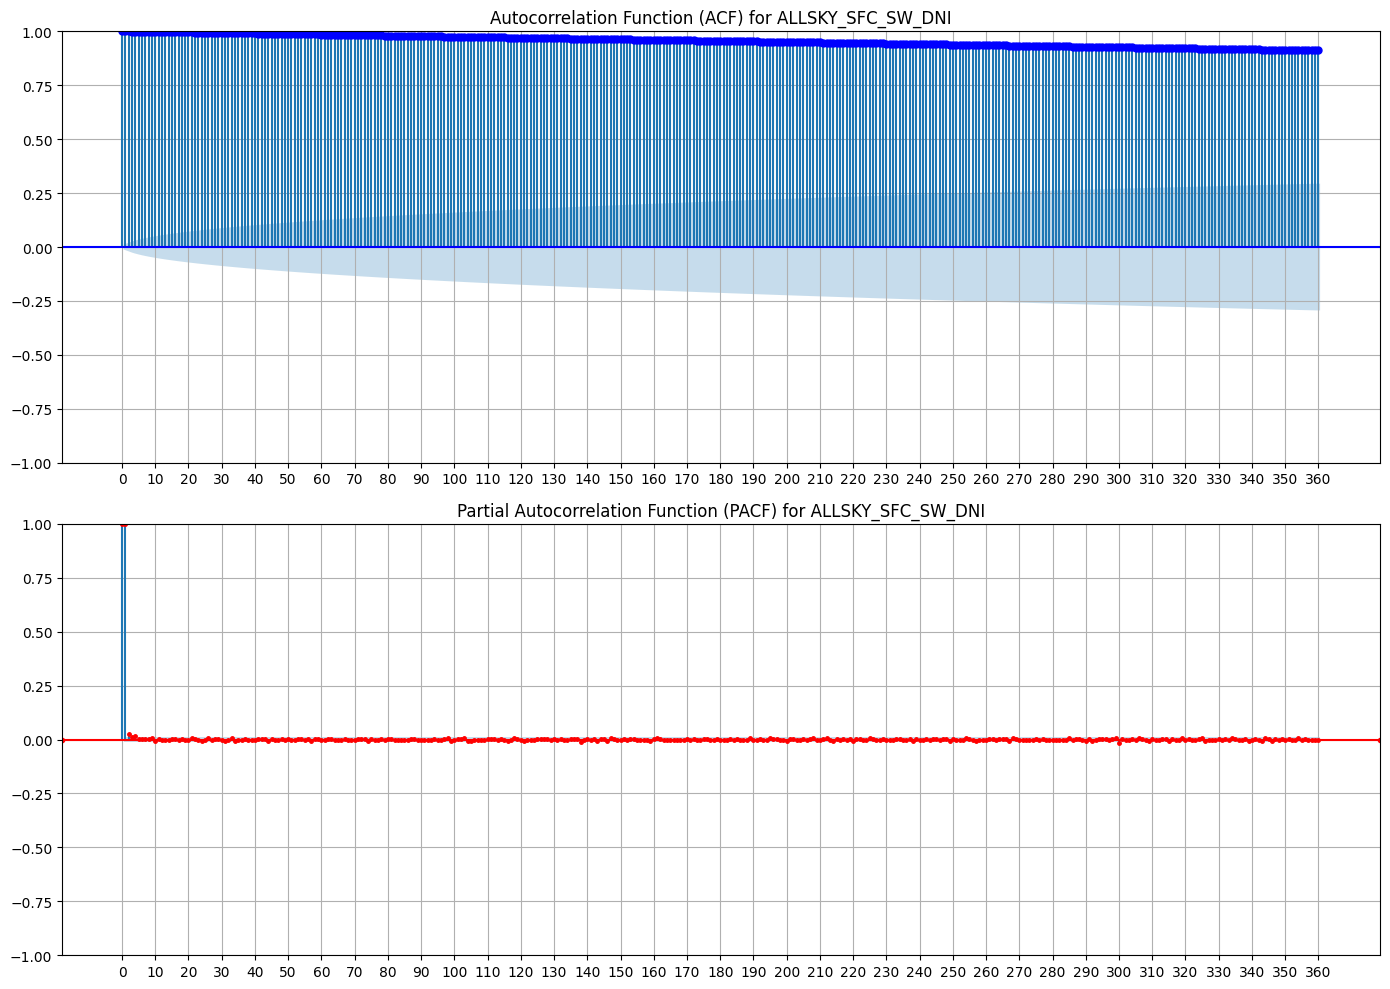

Analyzing ALLSKY_SFC_SW_DIFF series
ADF Statistic: -1.842135392407497
p-value: 0.3597522489558238


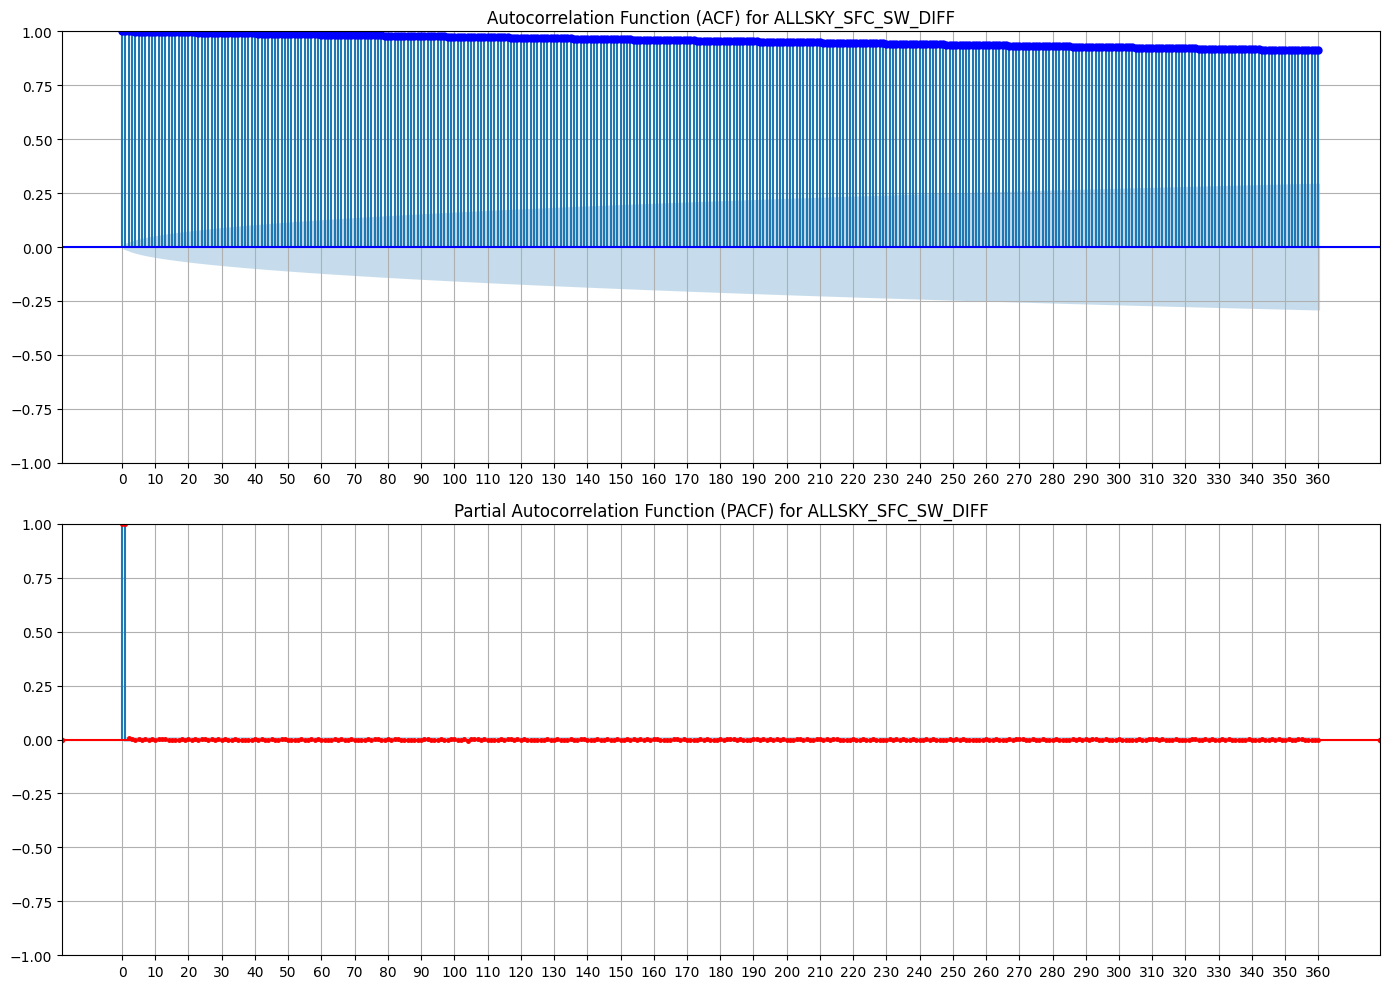

Analyzing TOA_SW_DWN series
ADF Statistic: -23.004181158563622
p-value: 0.0


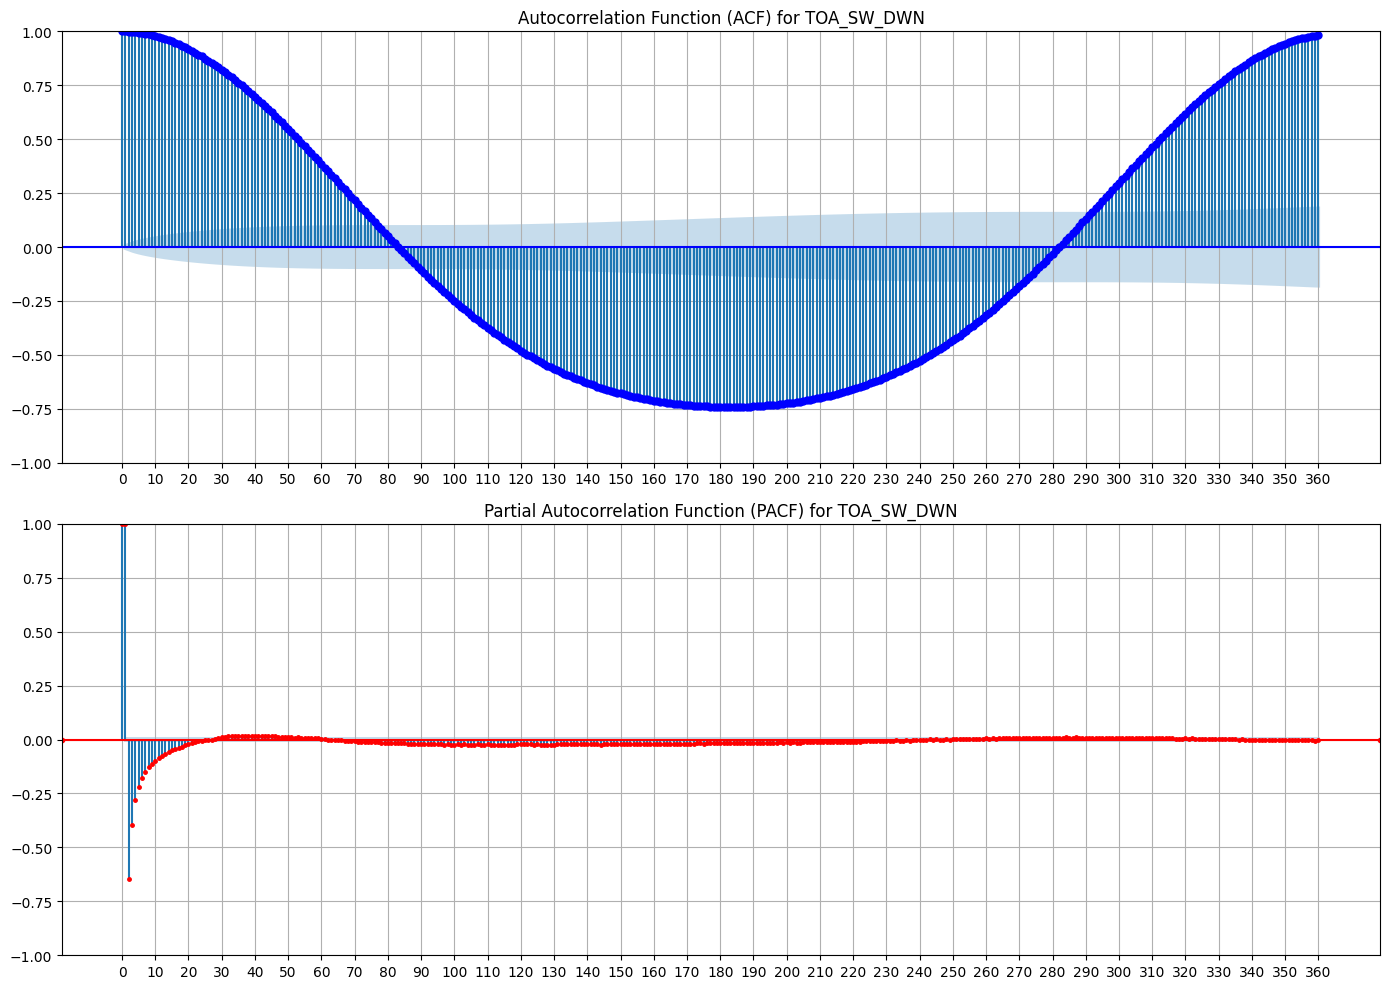

Analyzing ALLSKY_SFC_PAR_TOT series
ADF Statistic: -14.767619374113497
p-value: 2.3492490167931233e-27


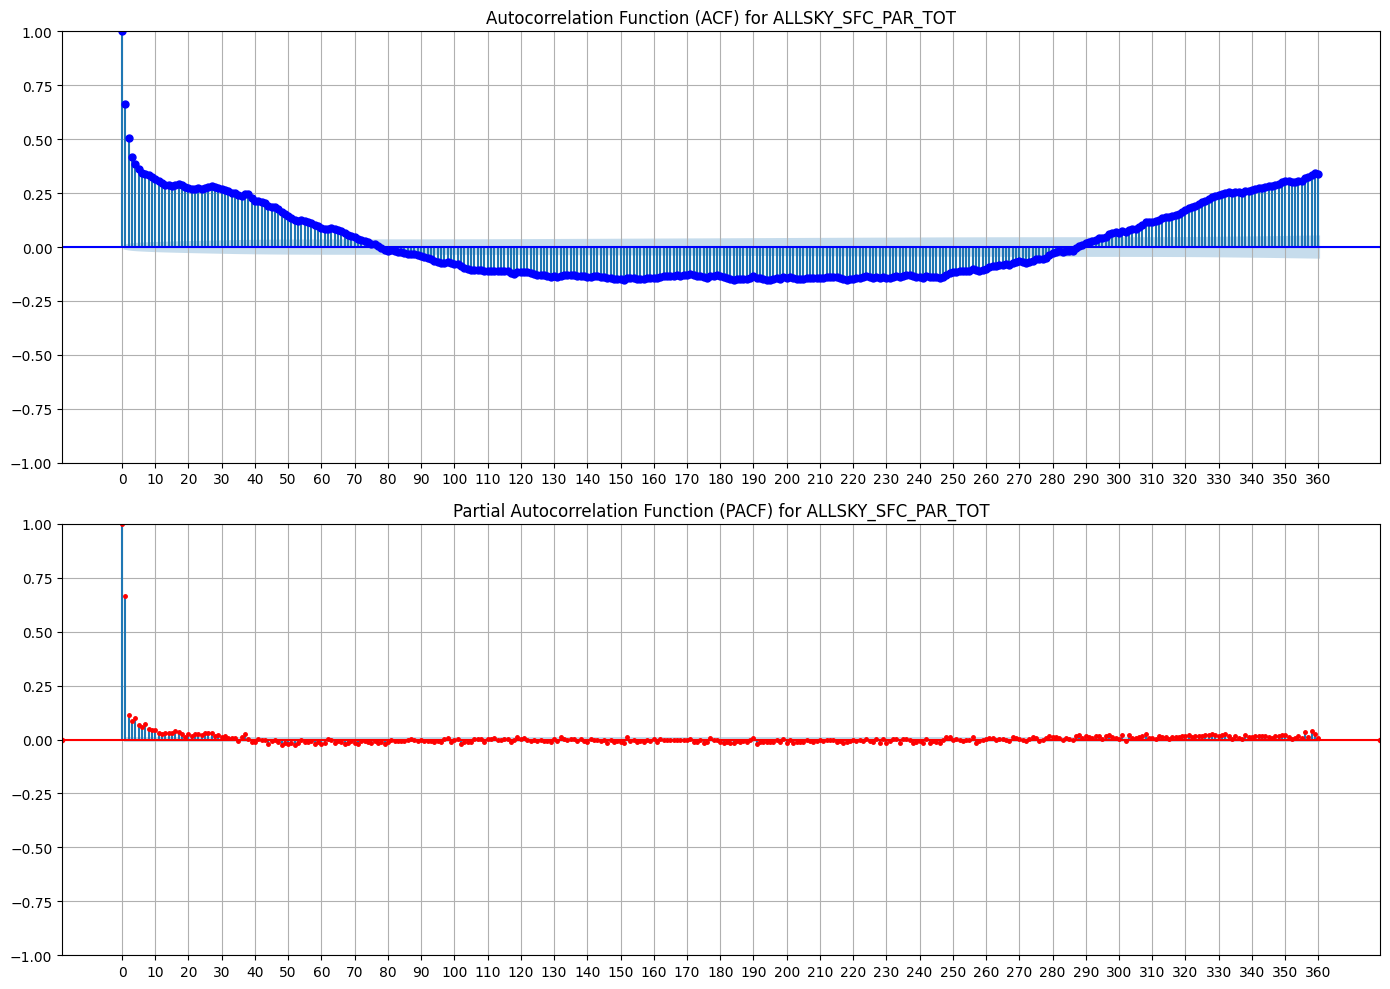

Analyzing CLRSKY_SFC_PAR_TOT series
ADF Statistic: -1.856466460270829
p-value: 0.3528094271284421


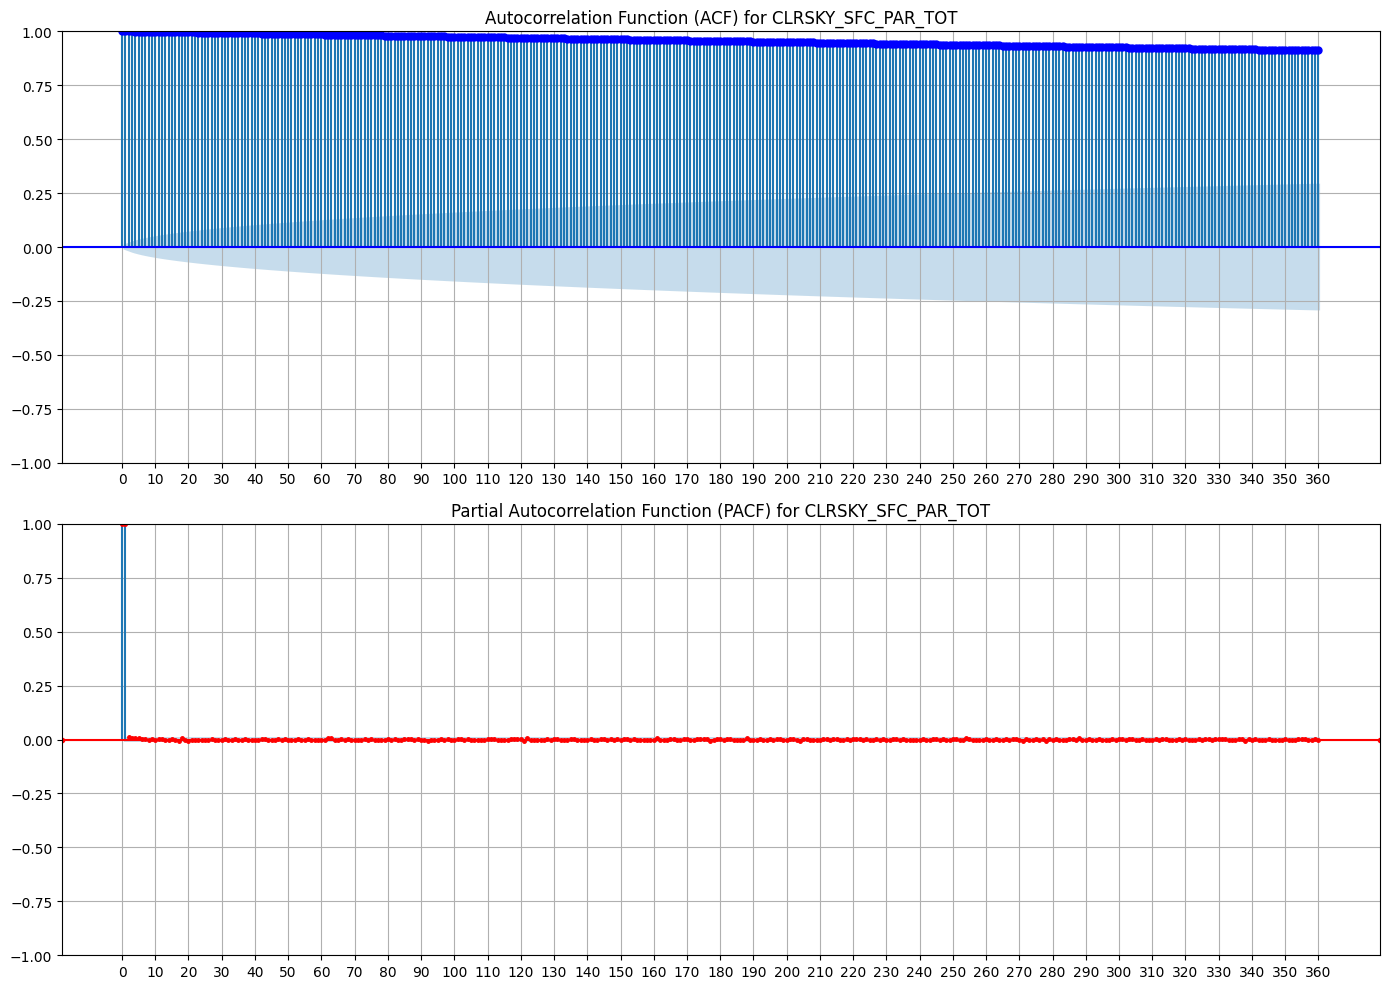

Analyzing ALLSKY_SFC_UVA series
ADF Statistic: -1.8600317432888807
p-value: 0.35109057841851077


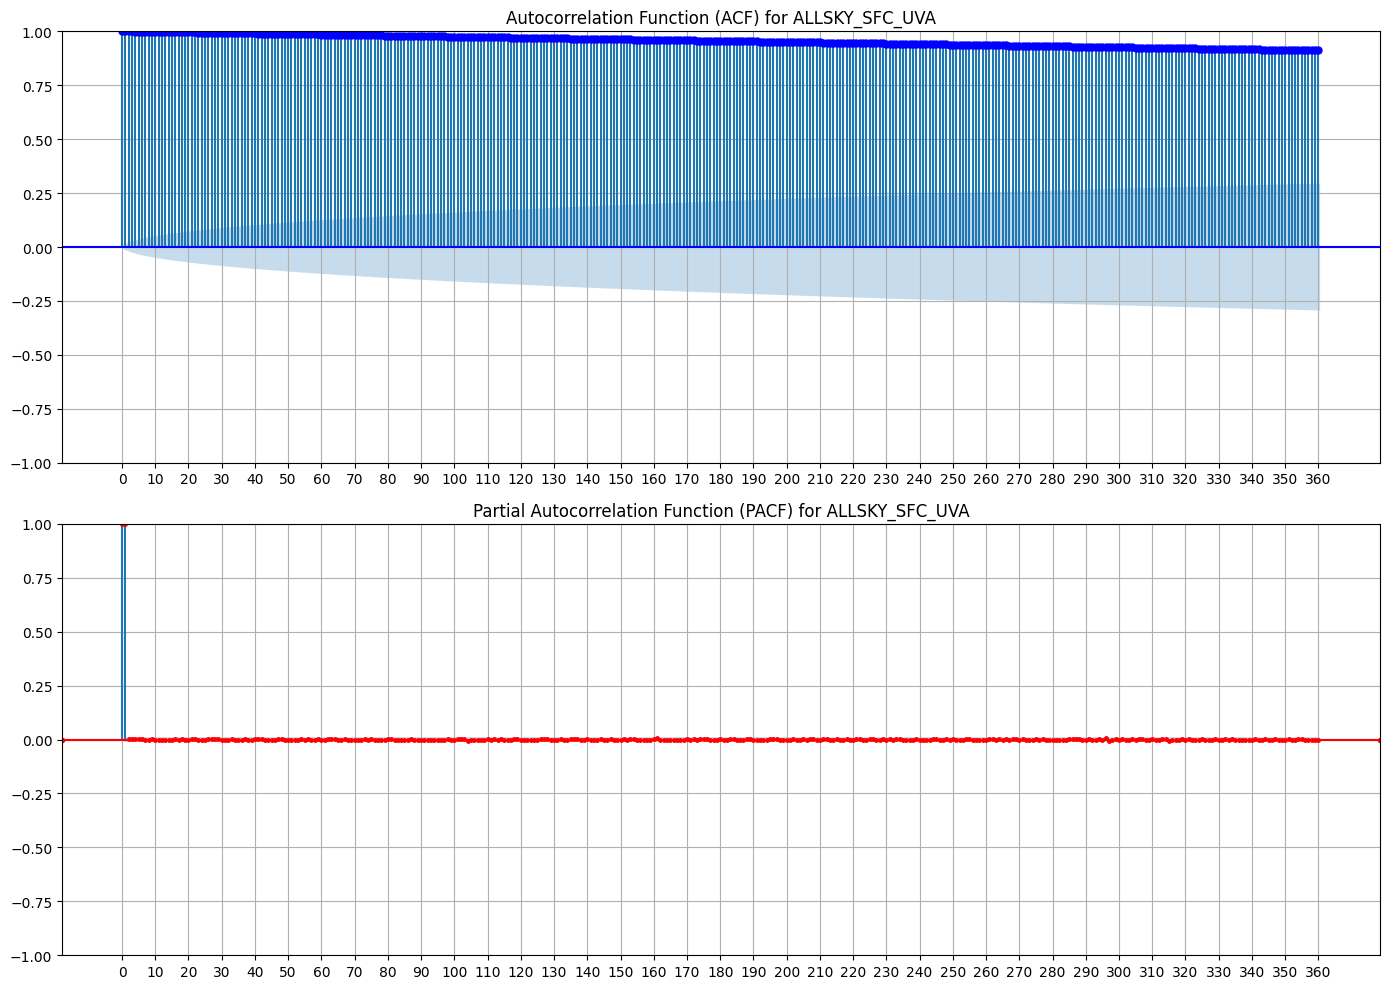

Analyzing ALLSKY_SFC_UVB series
ADF Statistic: -1.8393397721010616
p-value: 0.36111279699868065


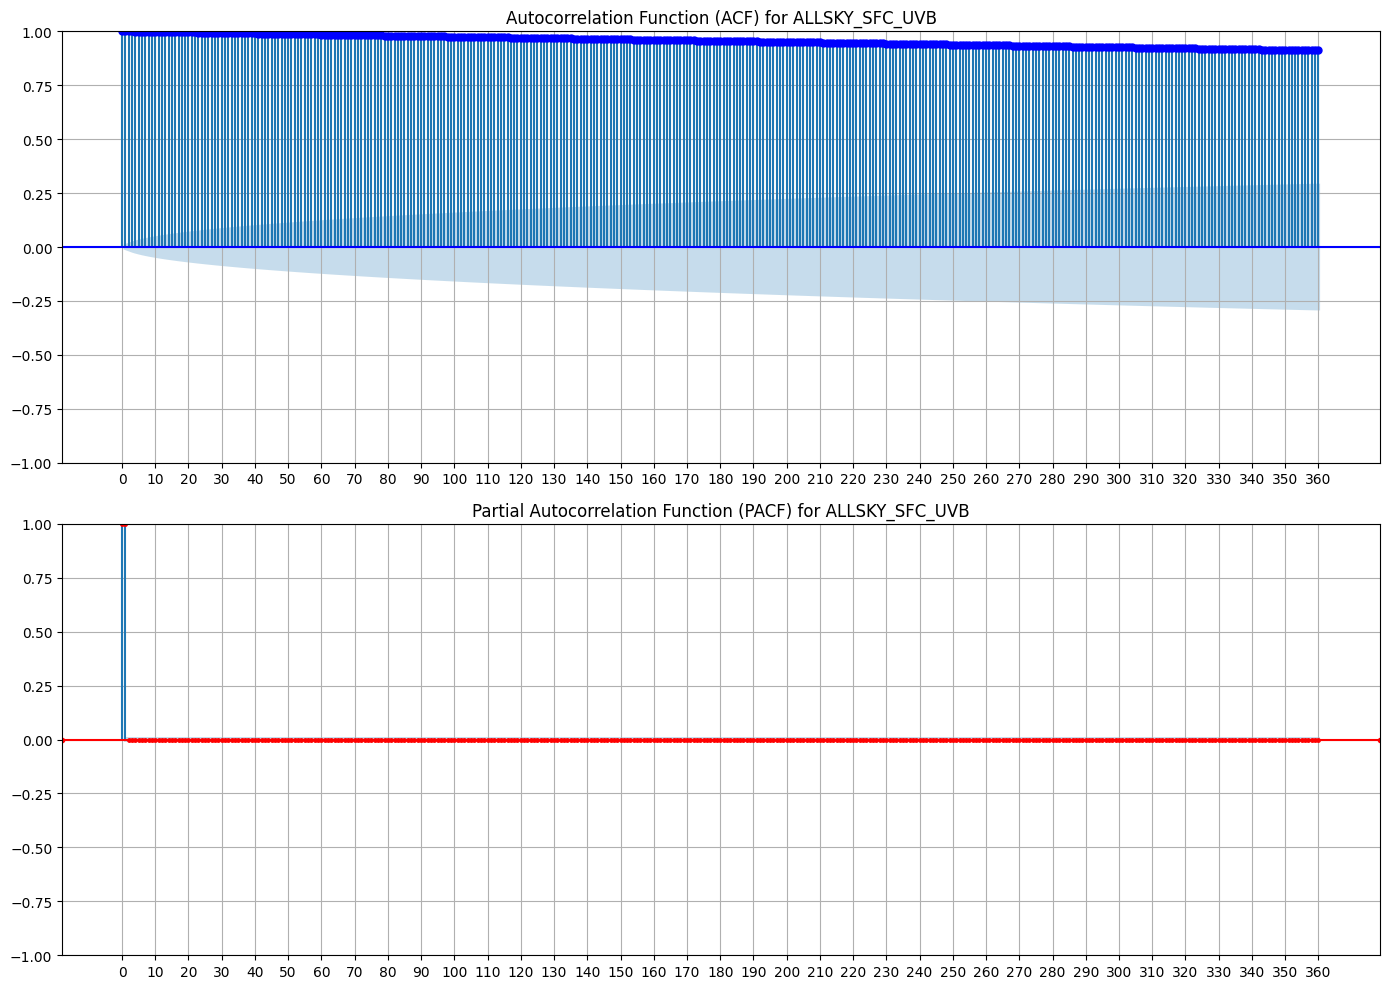

Analyzing ALLSKY_SFC_UV_INDEX series
ADF Statistic: -2.156280251175987
p-value: 0.22249391018629683


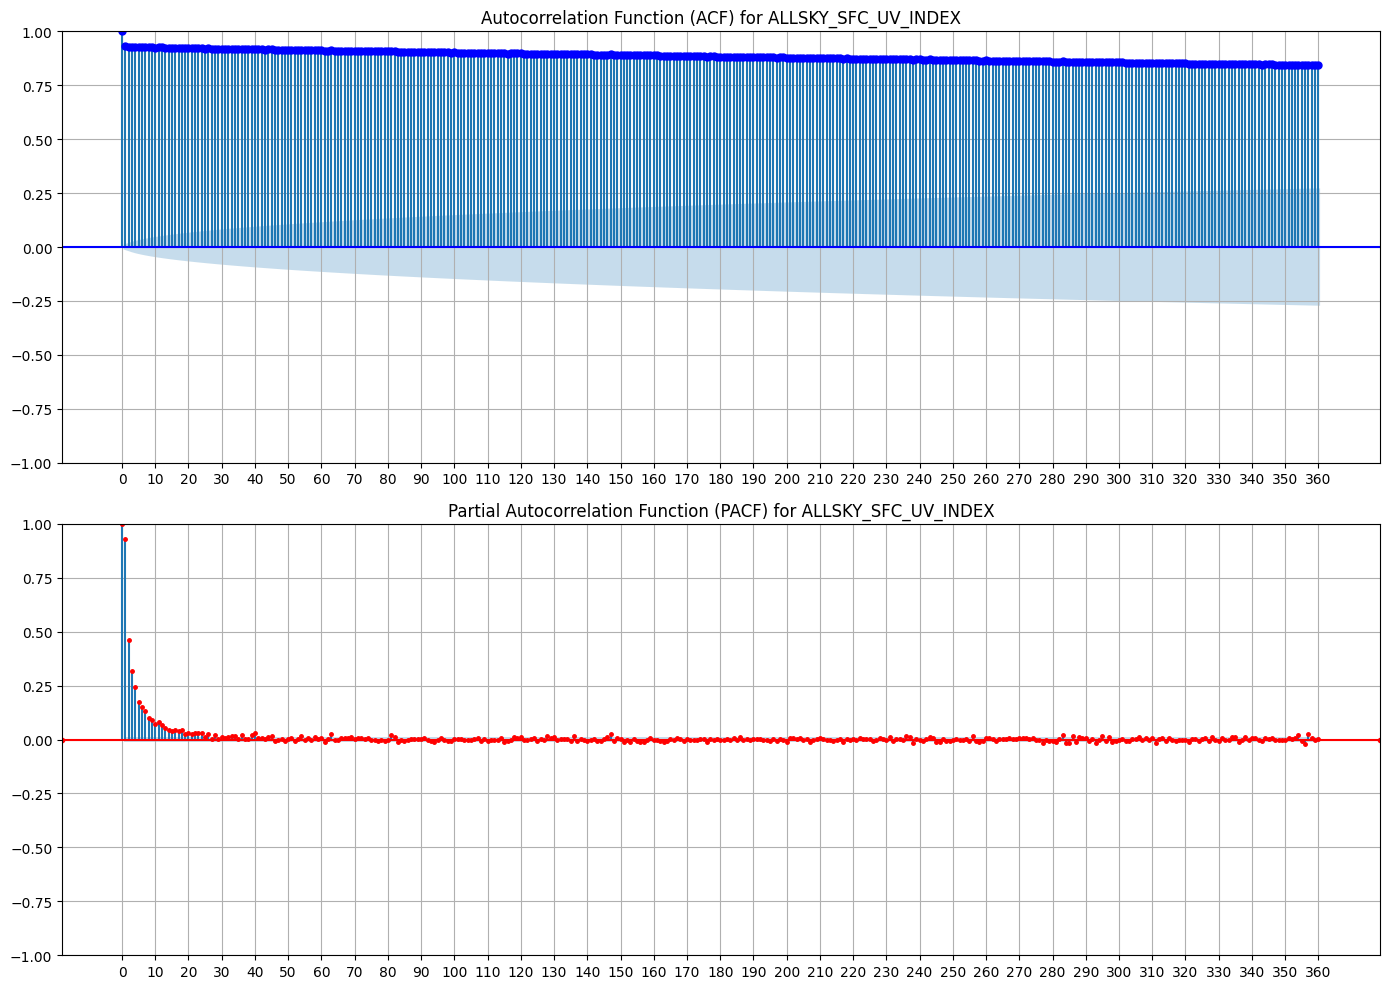

Analyzing T2M series
ADF Statistic: -18.49907399872626
p-value: 2.1217690496615602e-30


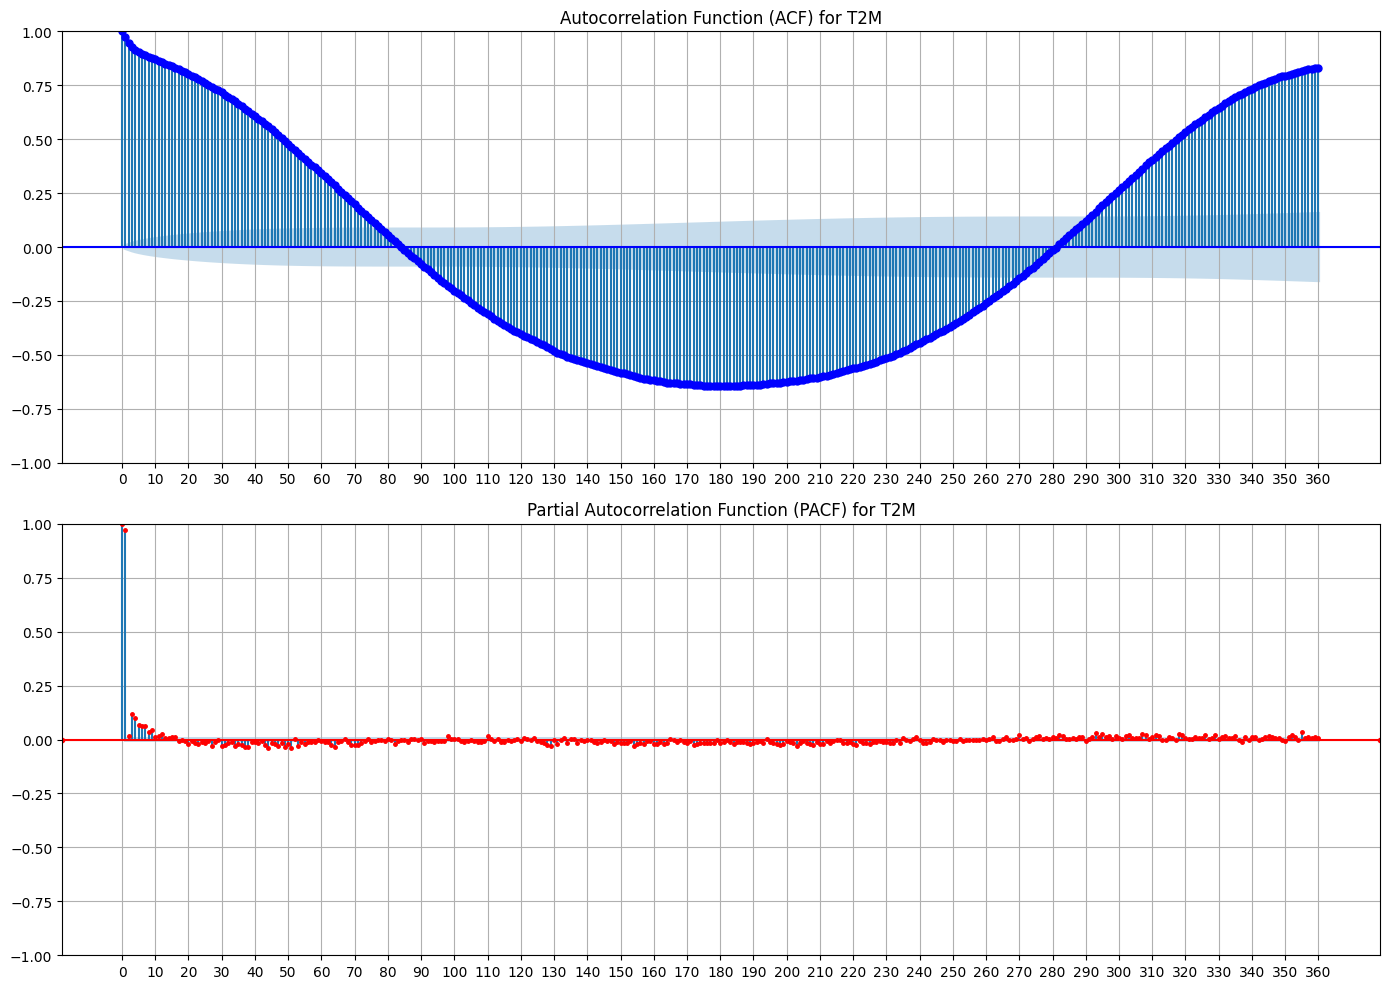

Analyzing T2MDEW series
ADF Statistic: -15.89458683680063
p-value: 8.464321407091837e-29


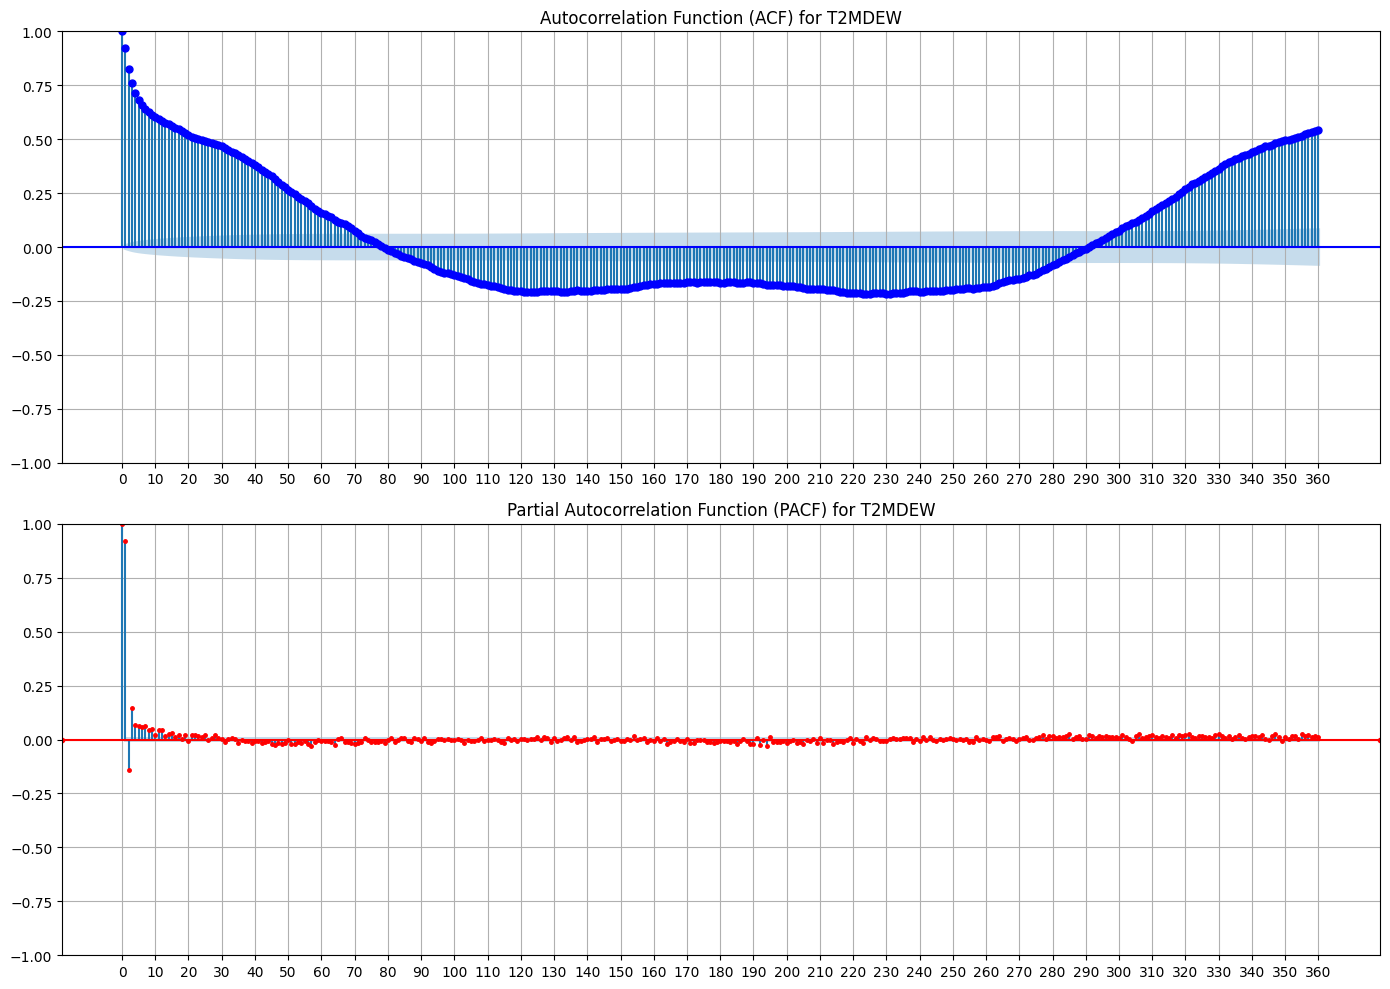

Analyzing T2MWET series
ADF Statistic: -18.582062082350255
p-value: 2.077456525532534e-30


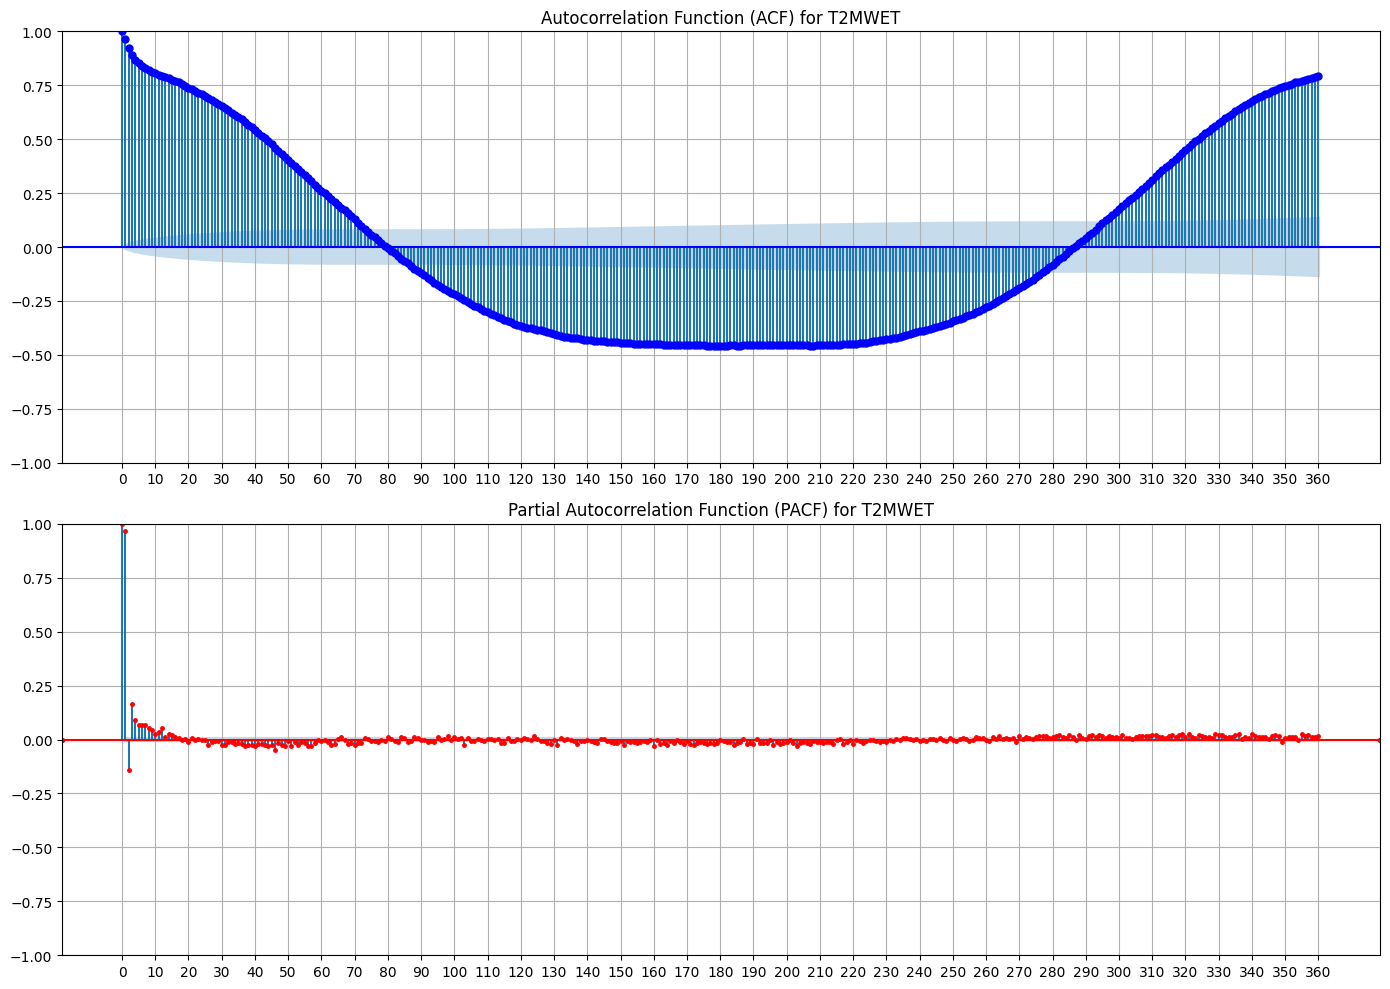

Analyzing TS series
ADF Statistic: -19.215886692435326
p-value: 0.0


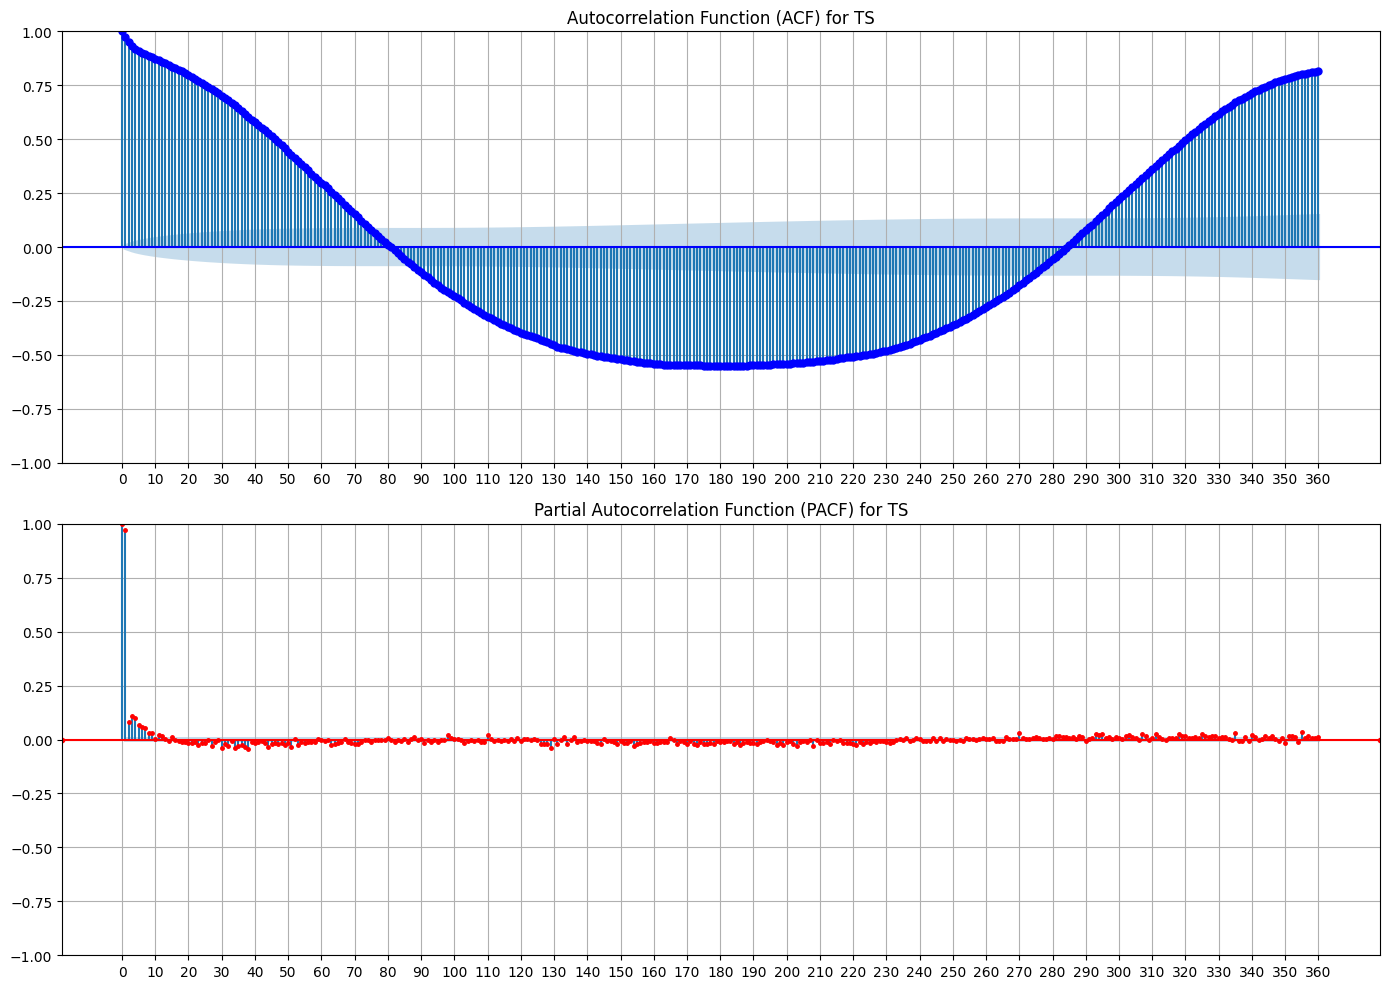

Analyzing T2M_RANGE series
ADF Statistic: -13.406256587959916
p-value: 4.464325583132837e-25


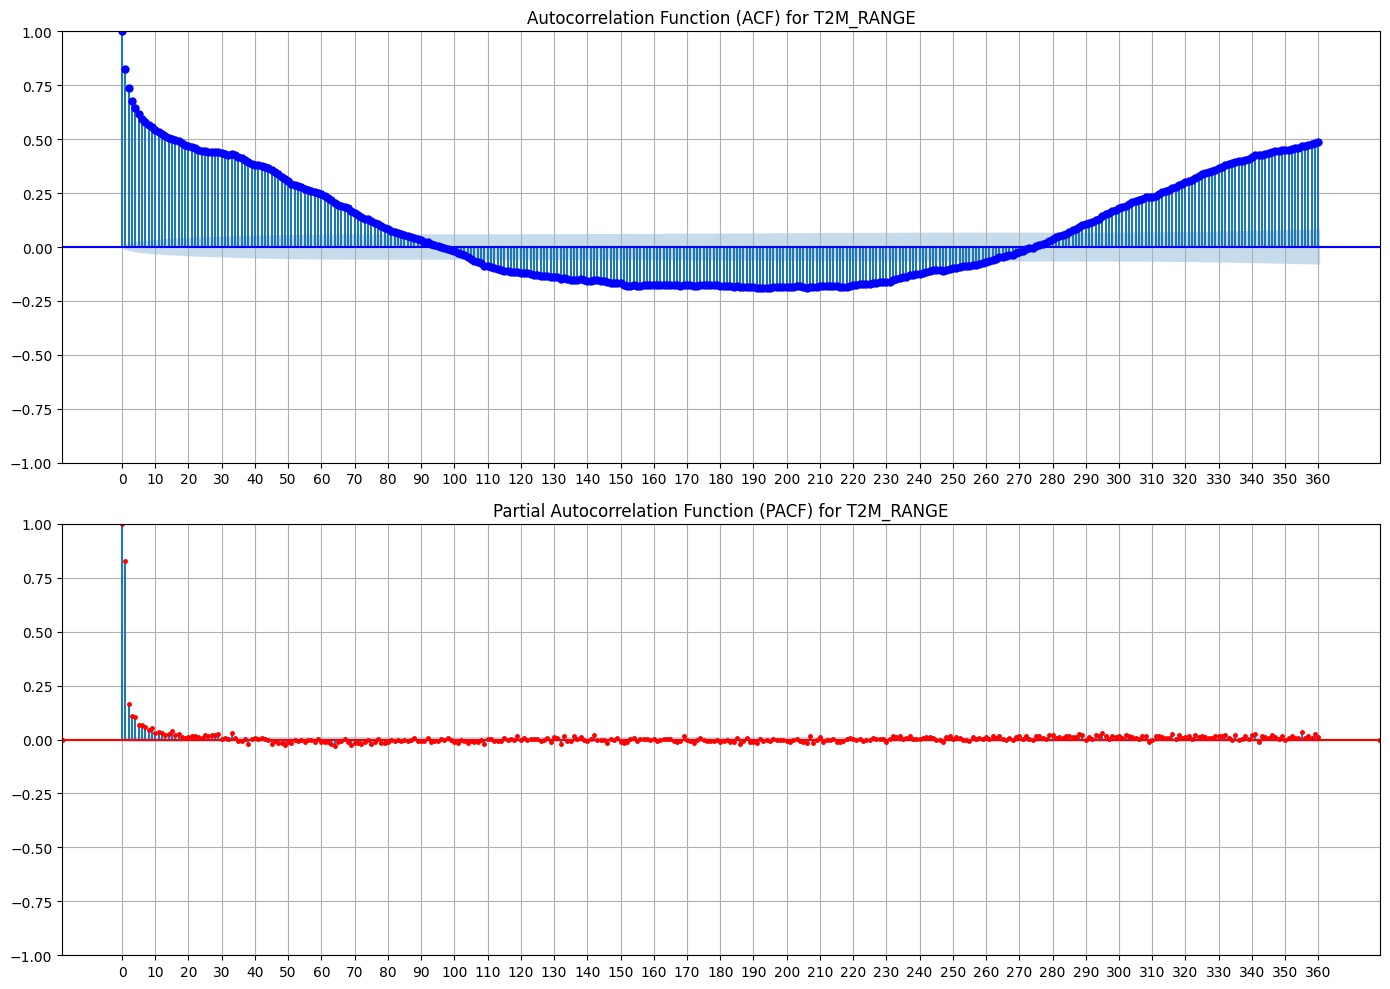

Analyzing T2M_MAX series
ADF Statistic: -15.95226805869673
p-value: 7.334239982960108e-29


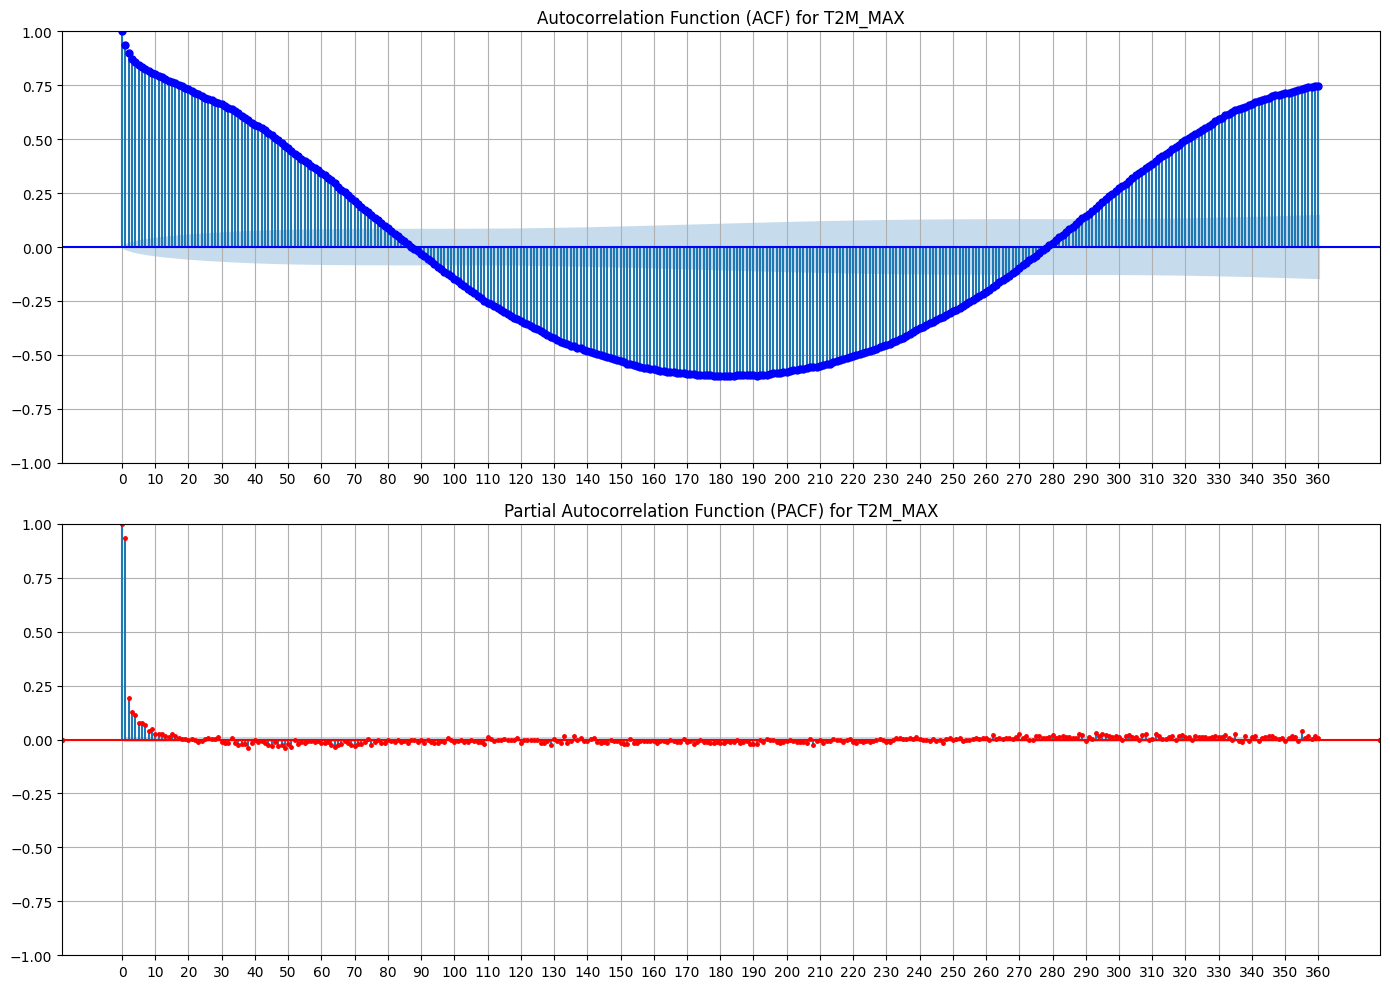

Analyzing T2M_MIN series
ADF Statistic: -17.78395552893003
p-value: 3.268260513468002e-30


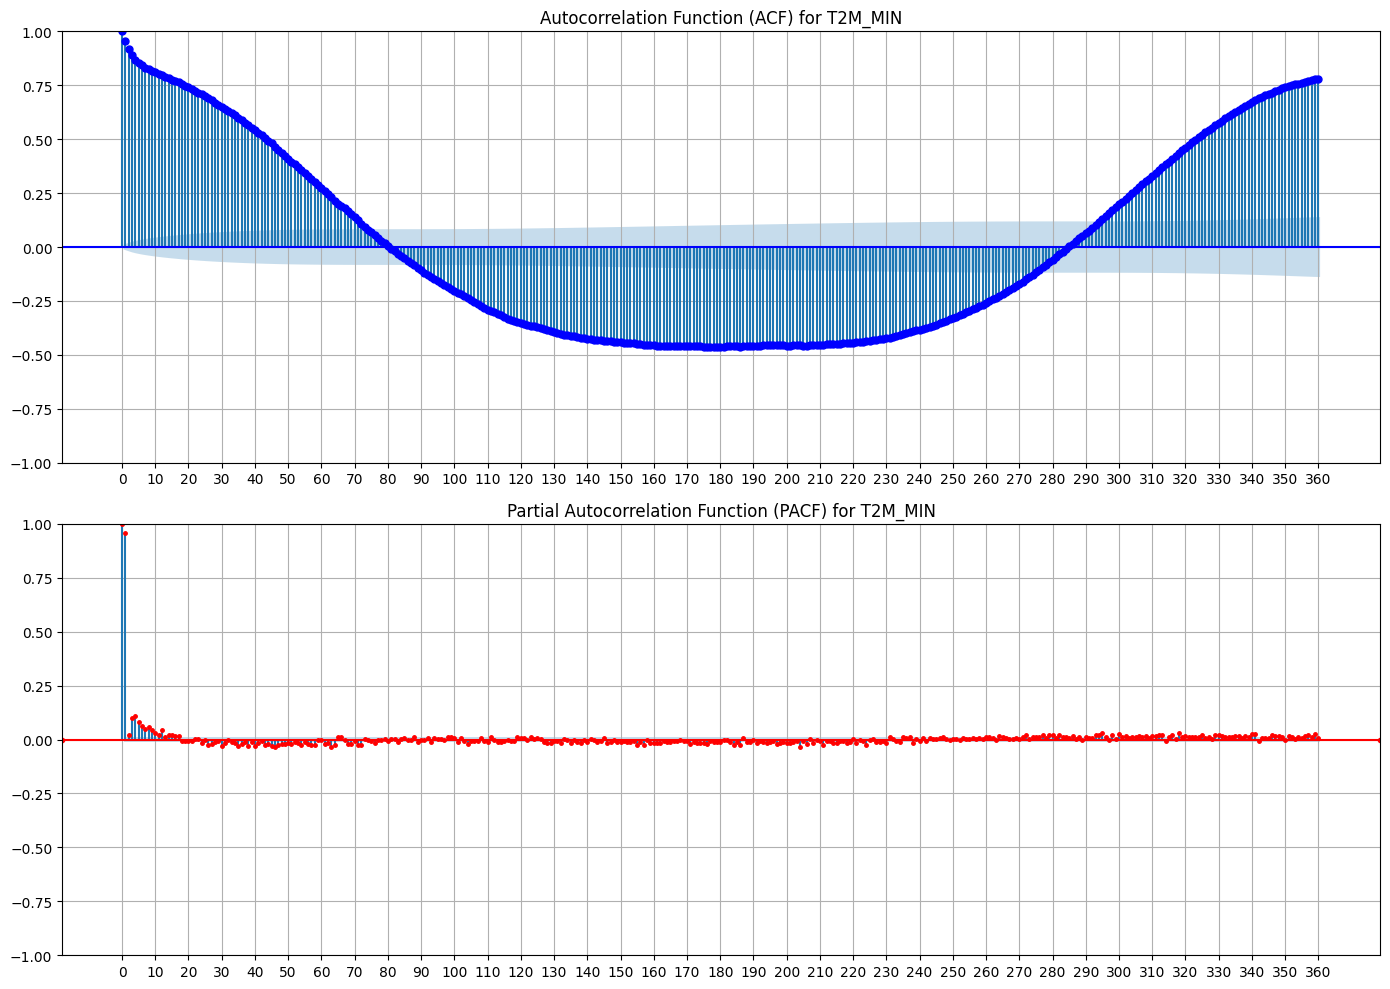

Analyzing QV2M series
ADF Statistic: -16.321570220963828
p-value: 3.1238867910453685e-29


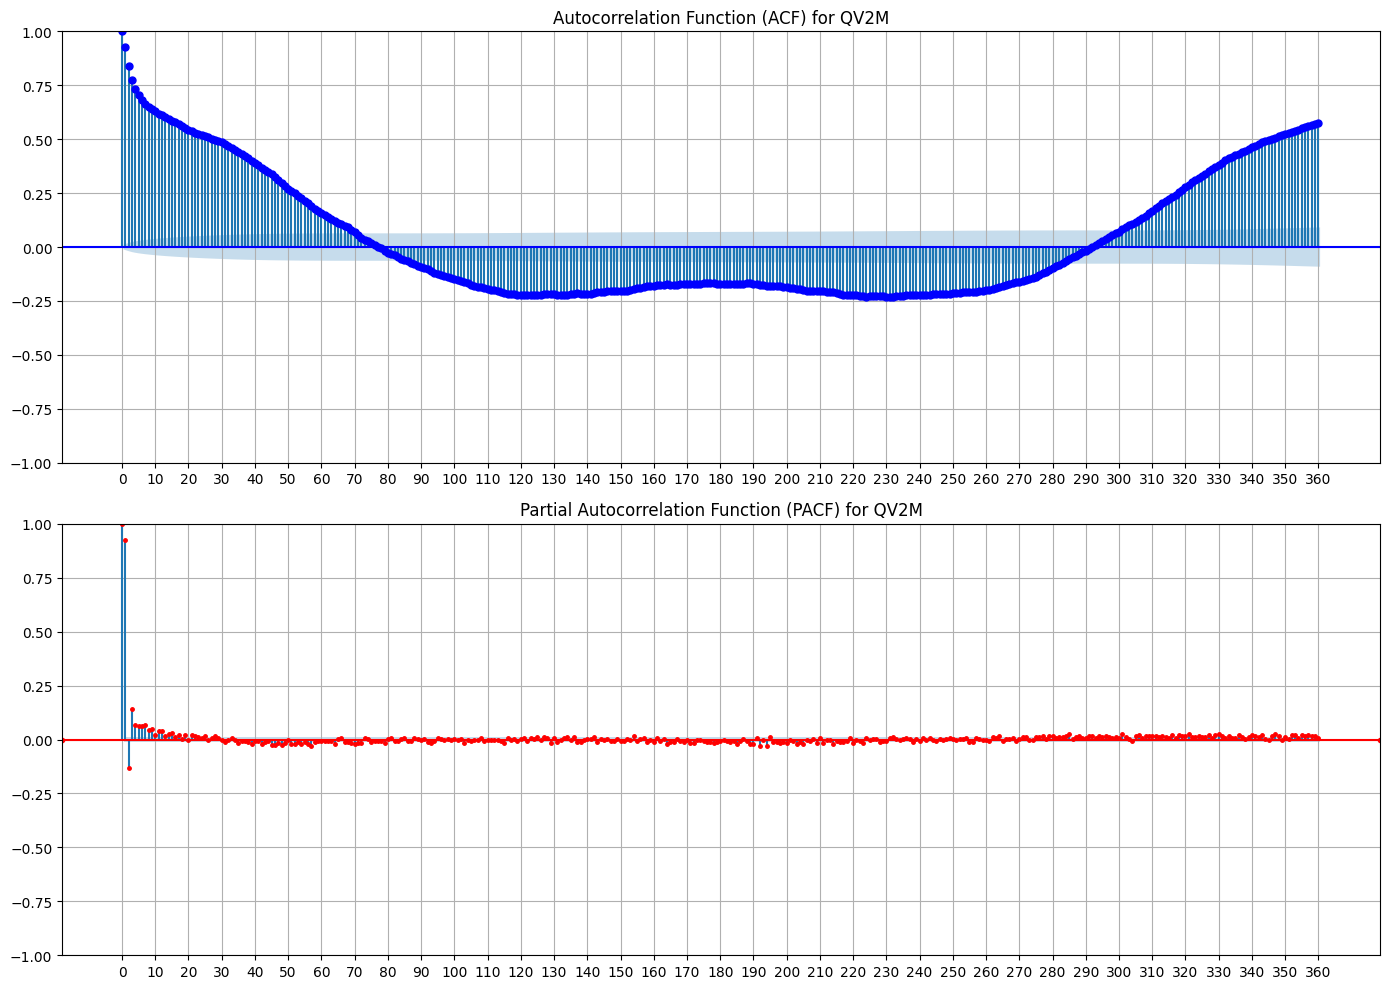

Analyzing RH2M series
ADF Statistic: -13.274597566294332
p-value: 7.91204678644379e-25


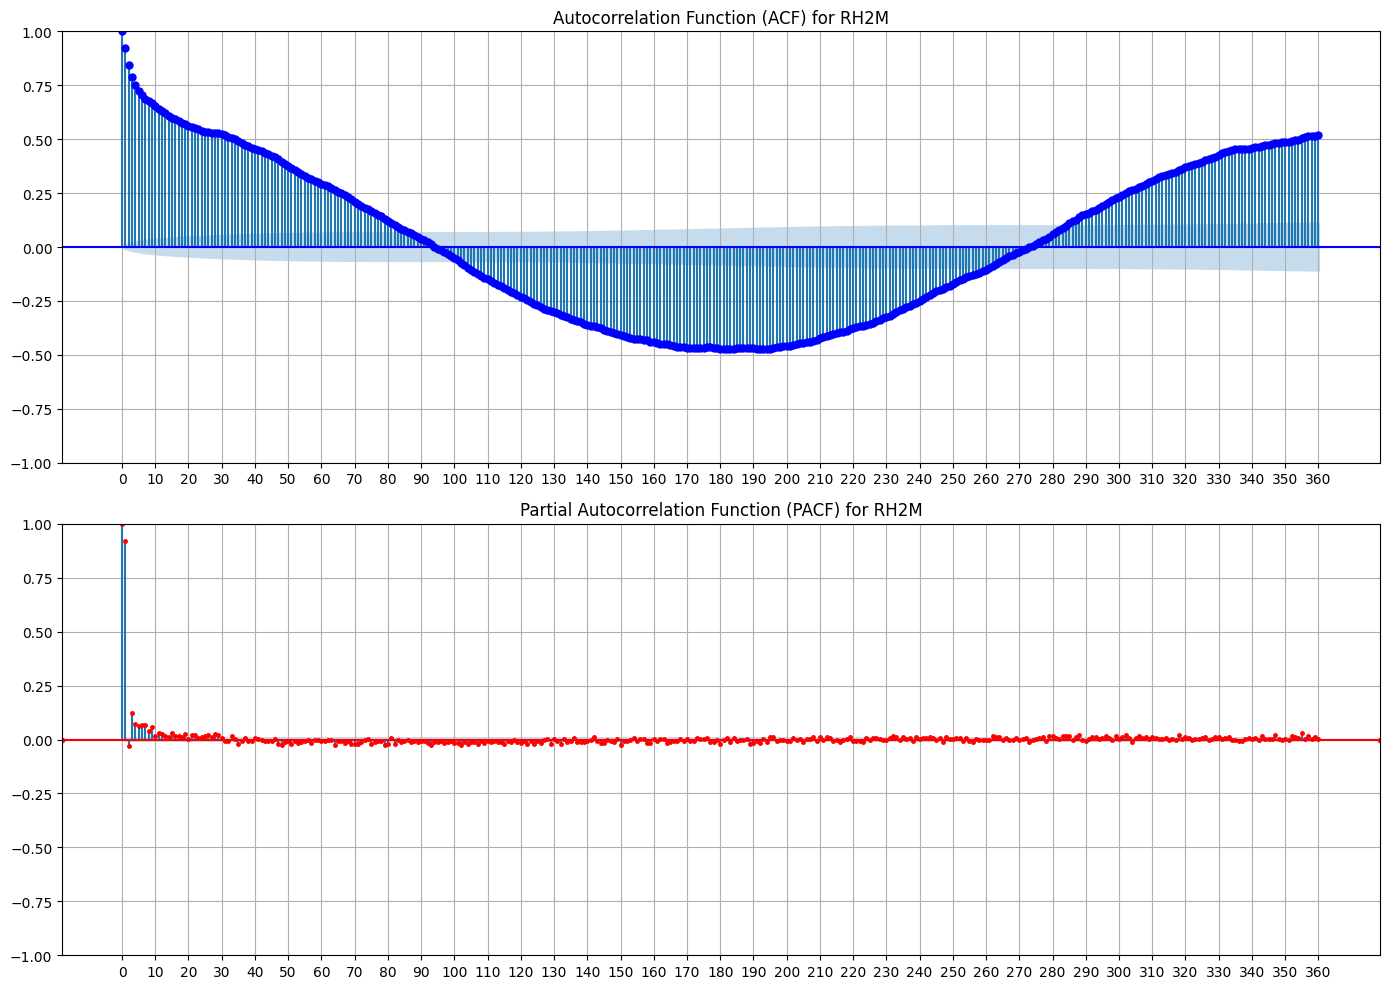

Analyzing PW series
ADF Statistic: -1.8396626003569725
p-value: 0.36095558417876417


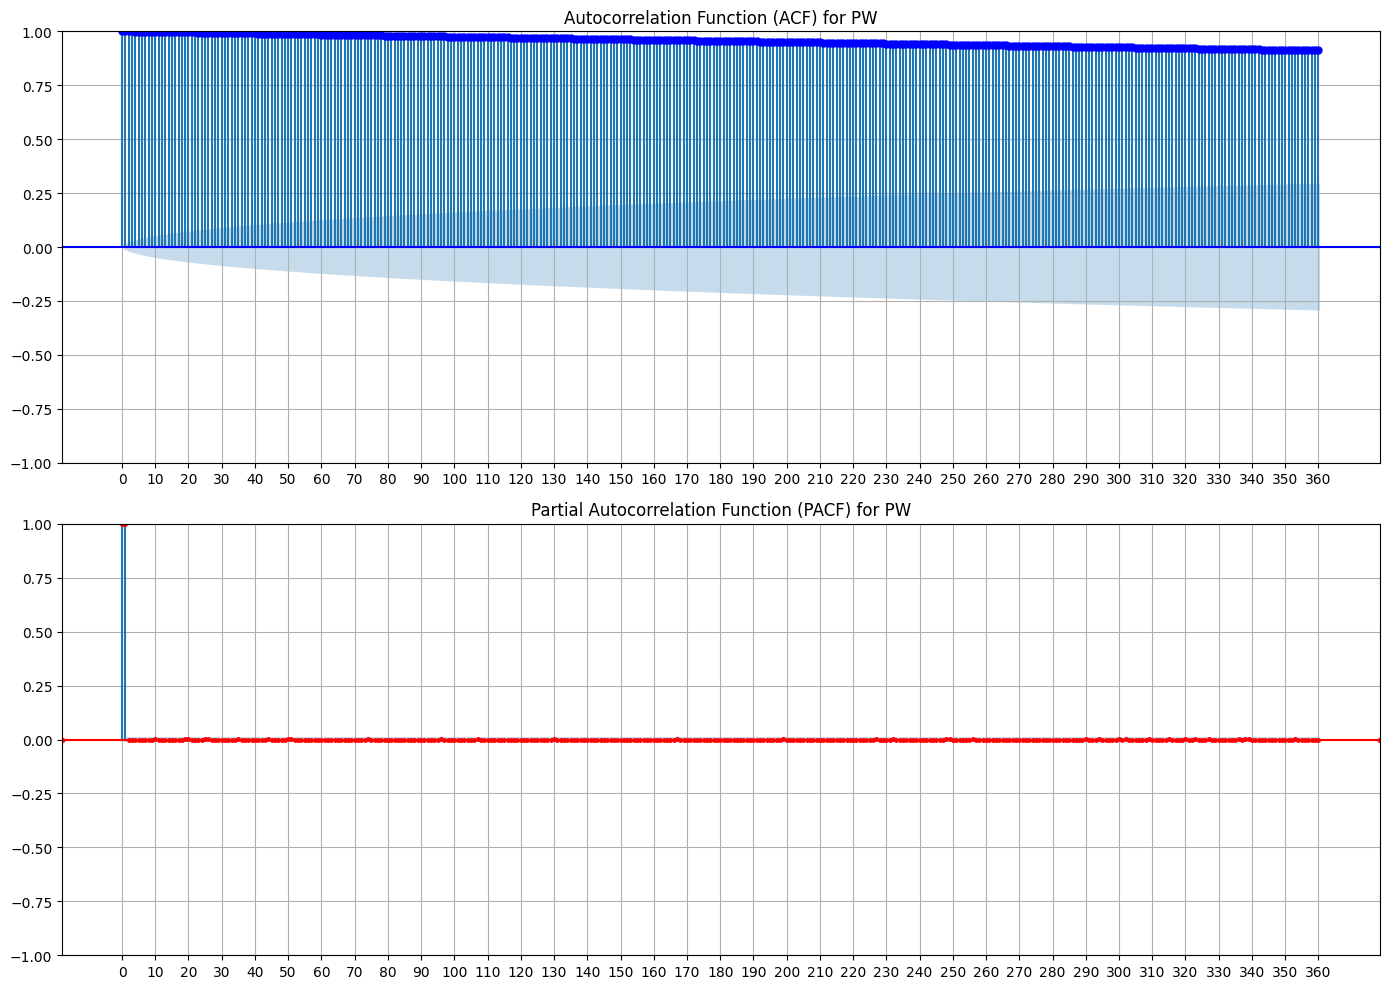

Analyzing PS series
ADF Statistic: -12.419526805457663
p-value: 4.167108885642249e-23


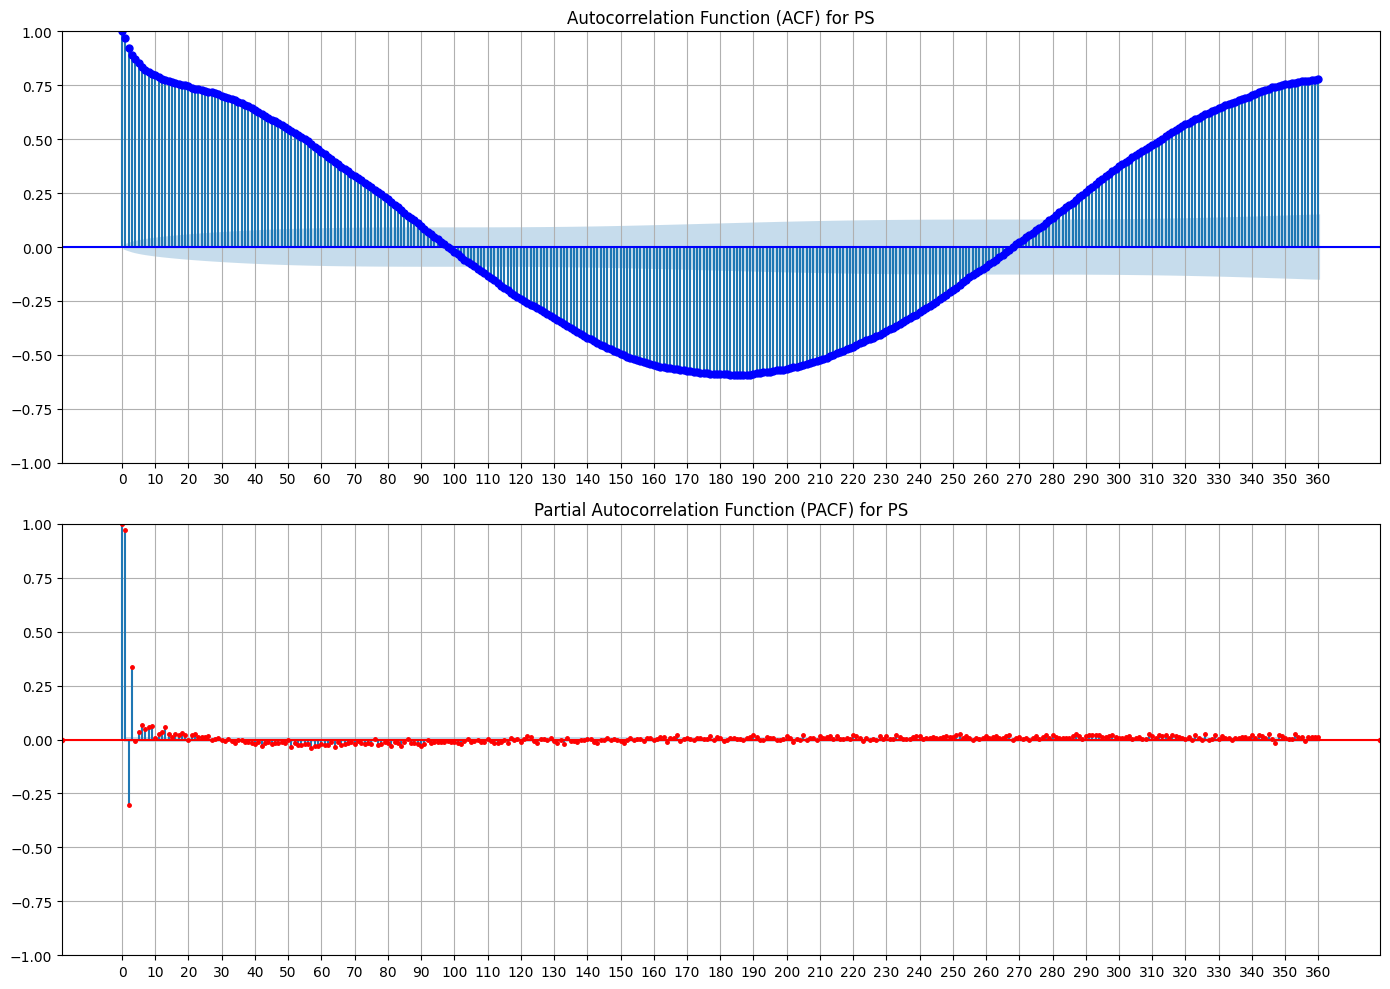

Analyzing WS2M series
ADF Statistic: -20.2358916547336
p-value: 0.0


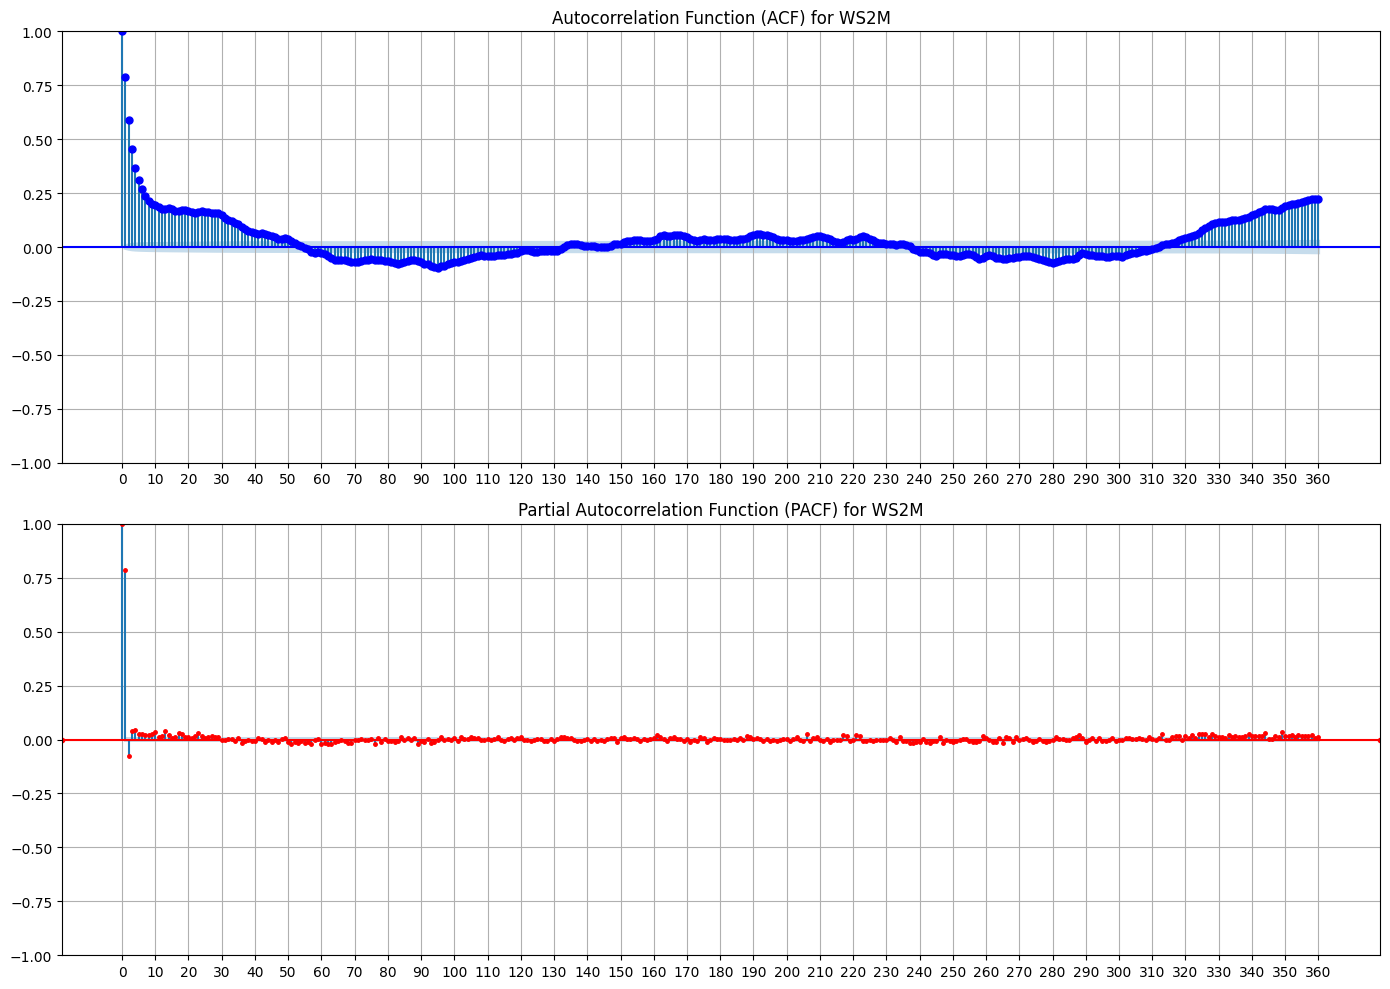

Analyzing WS2M_MAX series
ADF Statistic: -18.82957802633341
p-value: 2.022123778329051e-30


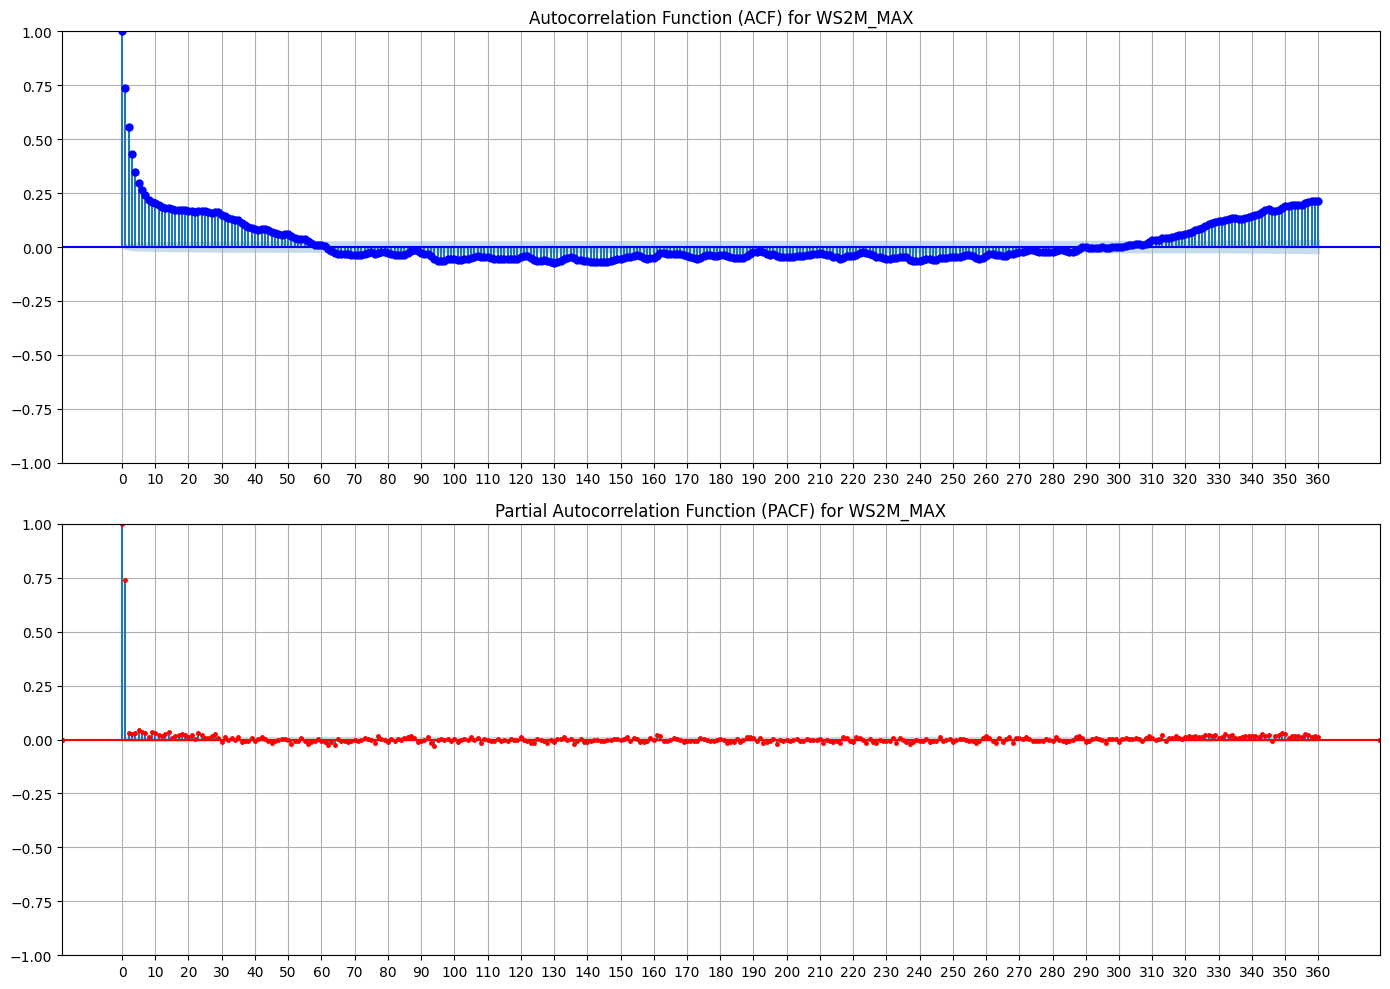

Analyzing WS2M_MIN series
ADF Statistic: -20.48302621280408
p-value: 0.0


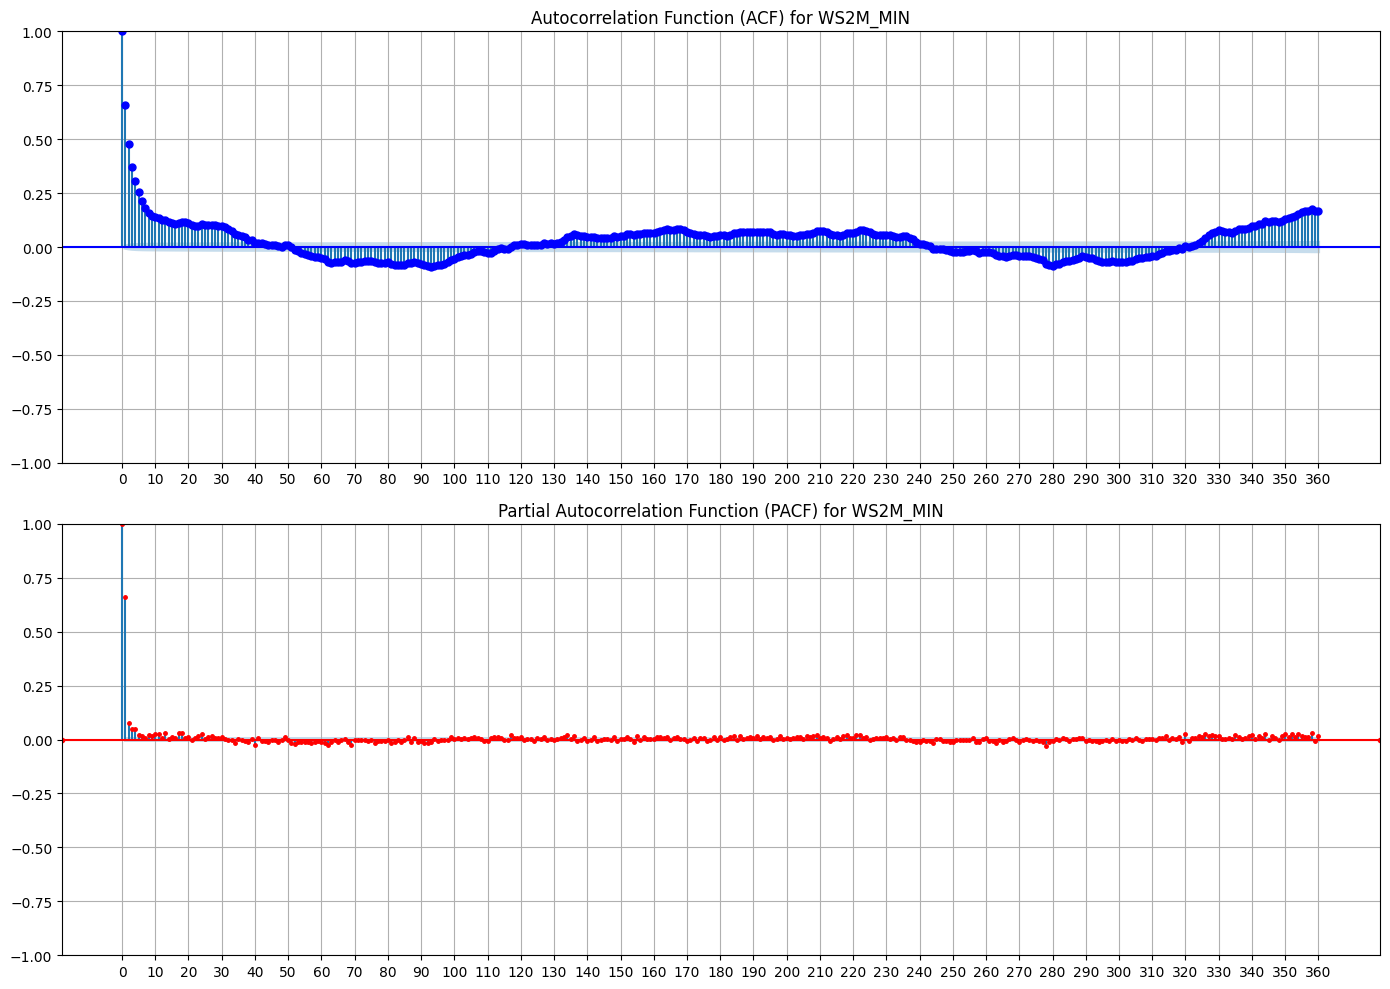

Analyzing WS2M_RANGE series
ADF Statistic: -15.990780951210157
p-value: 6.674972137844552e-29


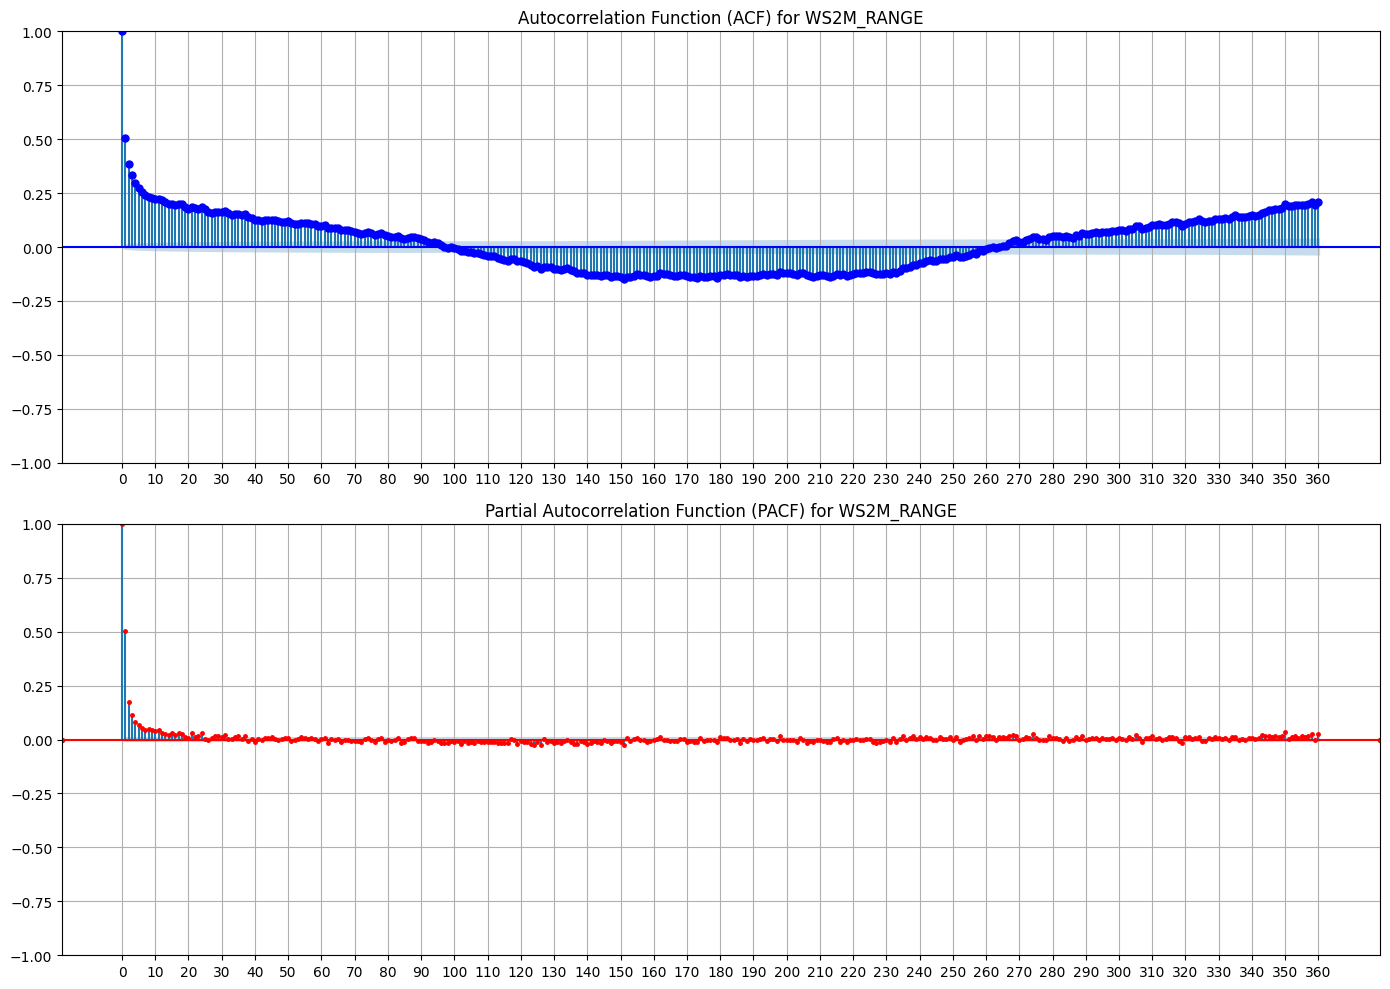

Analyzing WD2M series
ADF Statistic: -14.214139363570215
p-value: 1.7013459941535644e-26


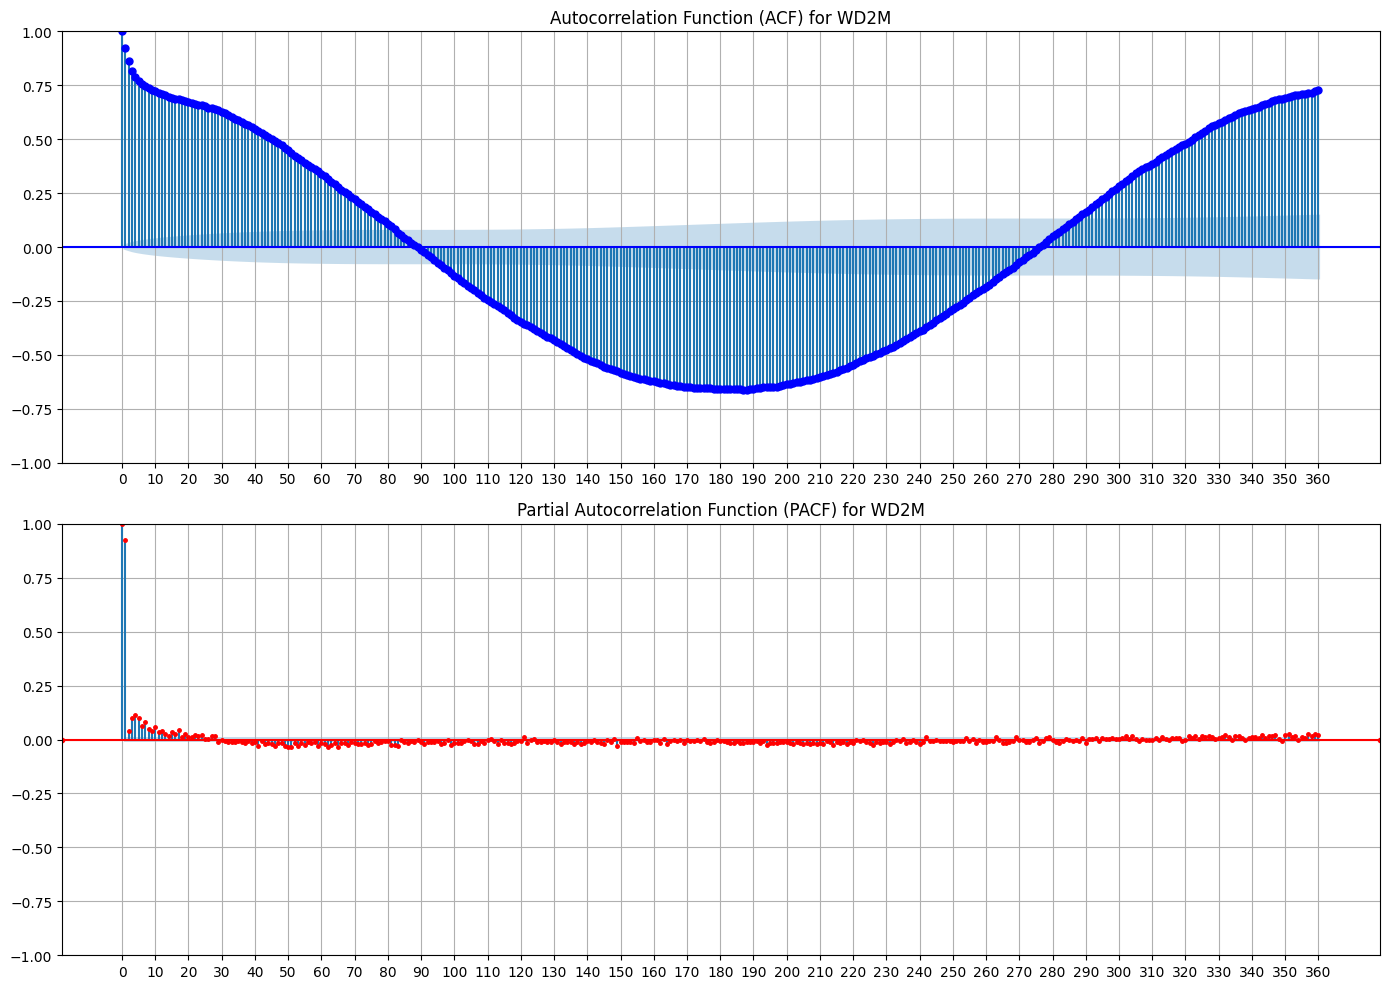

Analyzing WS10M series
ADF Statistic: -20.140200553595726
p-value: 0.0


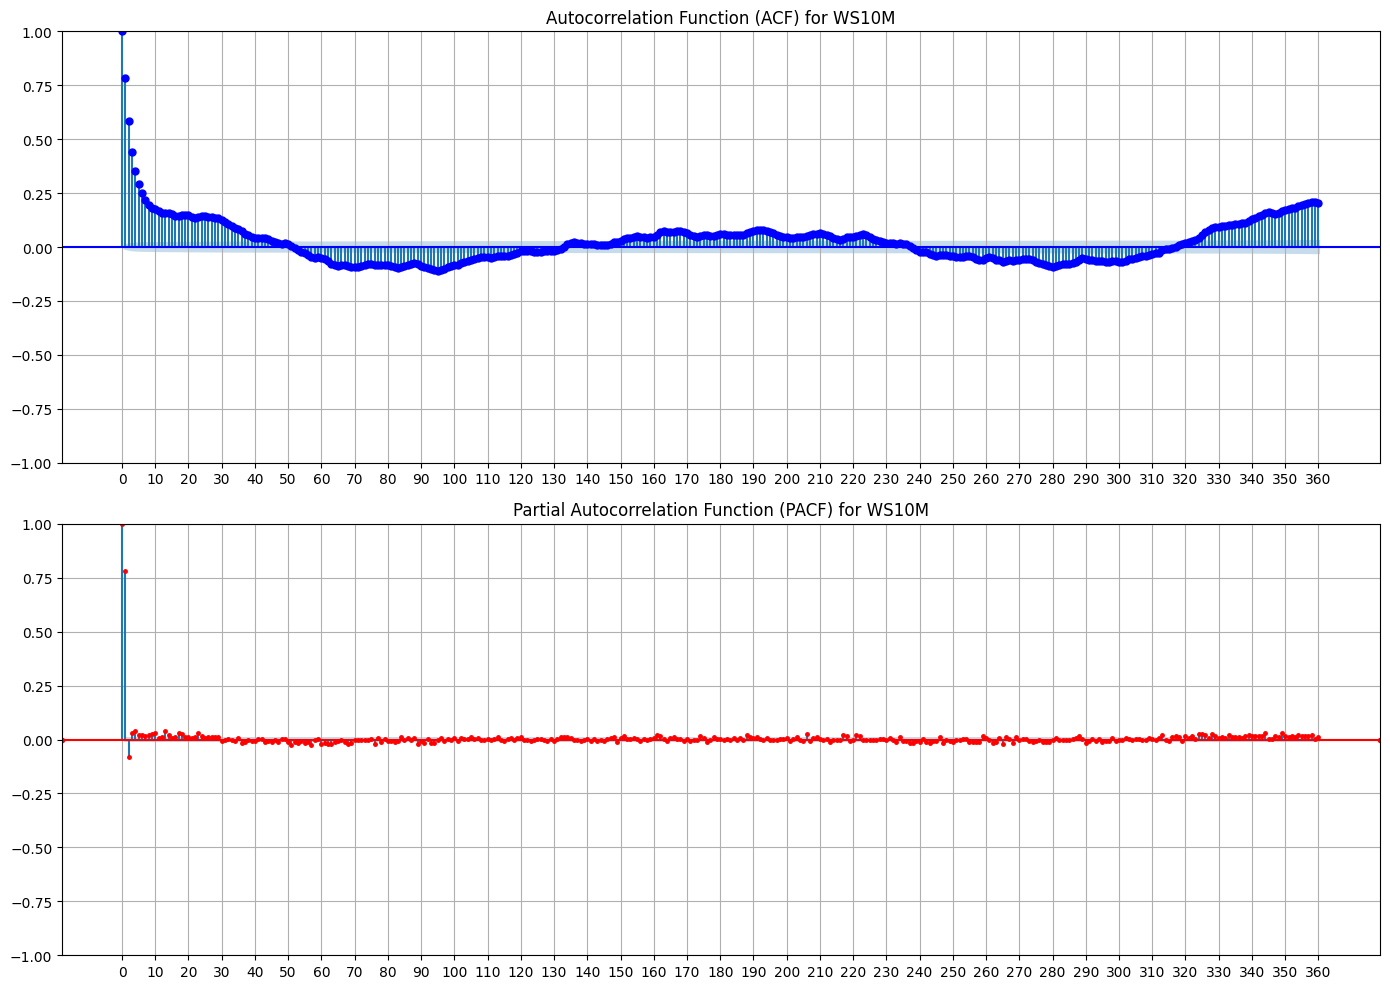

Analyzing WS10M_MAX series
ADF Statistic: -19.22627922737314
p-value: 0.0


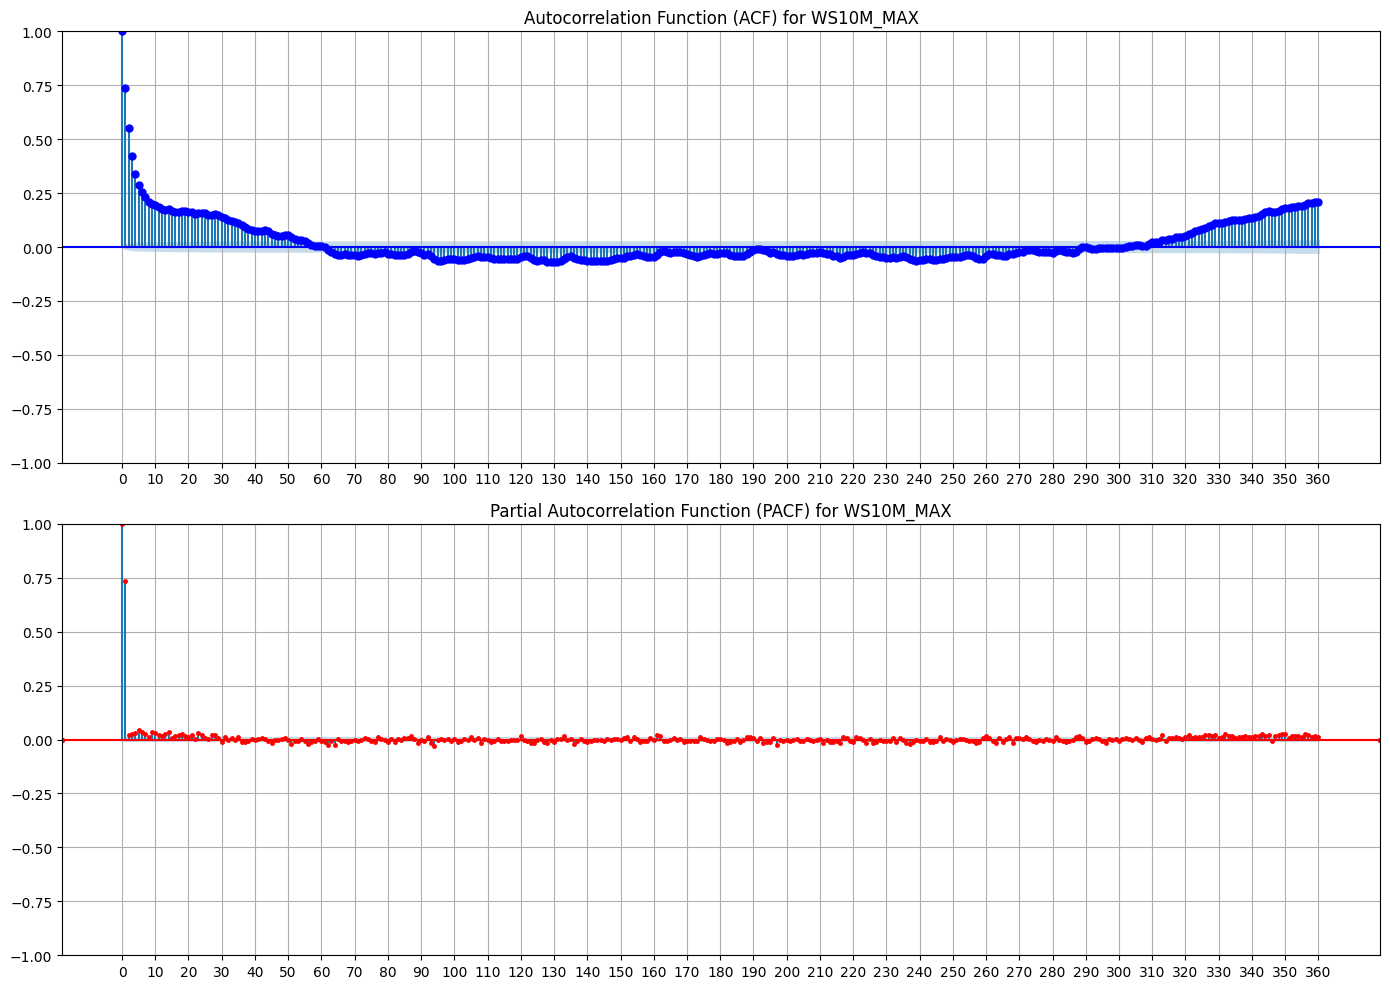

Analyzing WS10M_MIN series
ADF Statistic: -21.257706072423197
p-value: 0.0


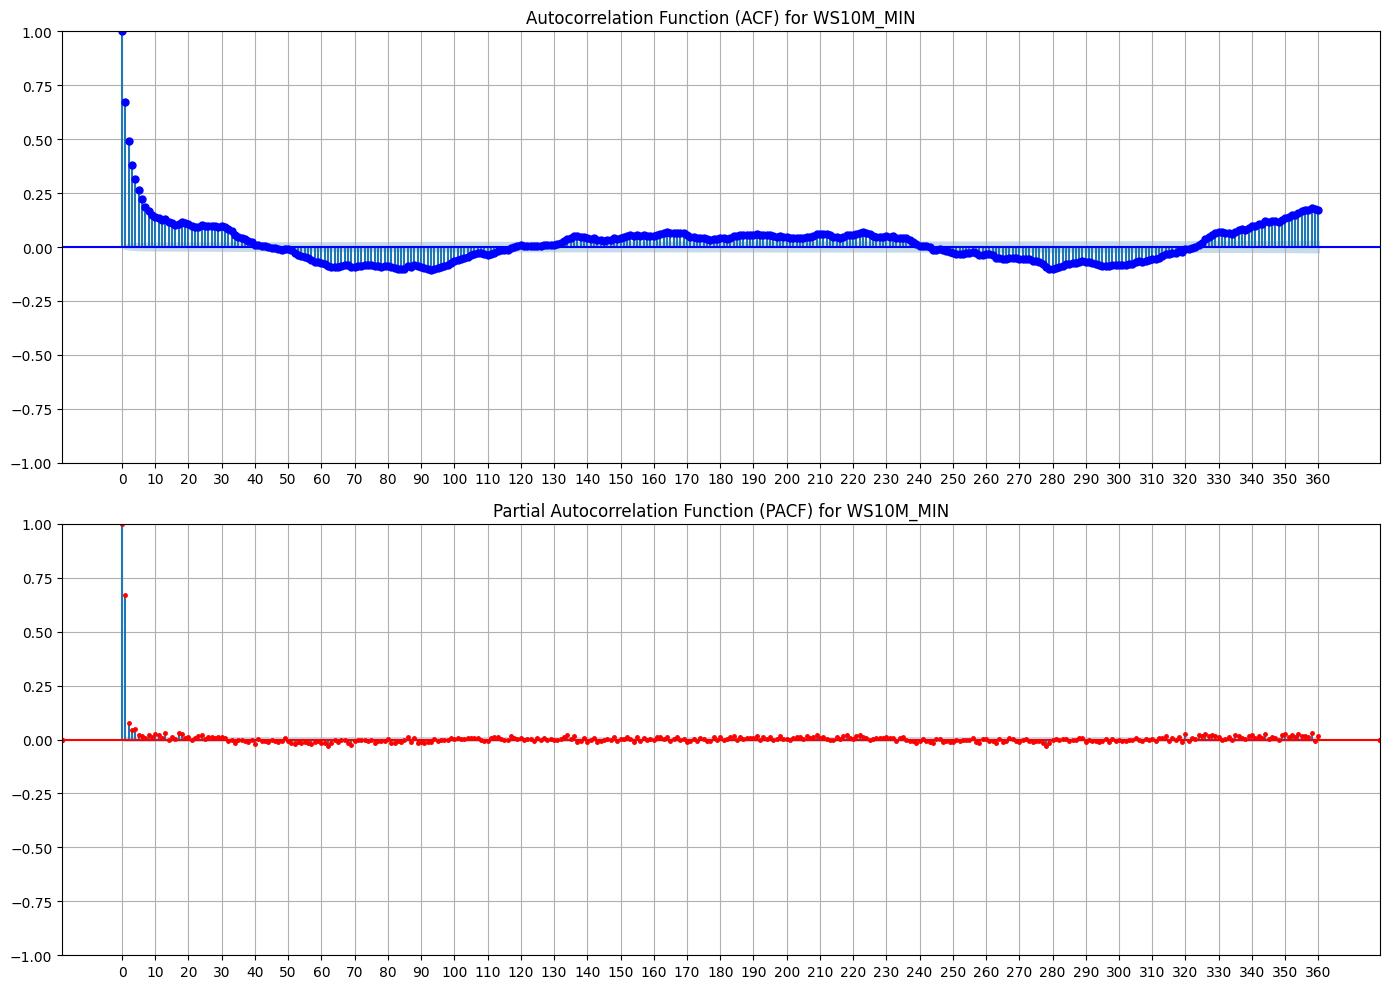

Analyzing WS10M_RANGE series
ADF Statistic: -16.914819152038767
p-value: 1.0042890346453356e-29


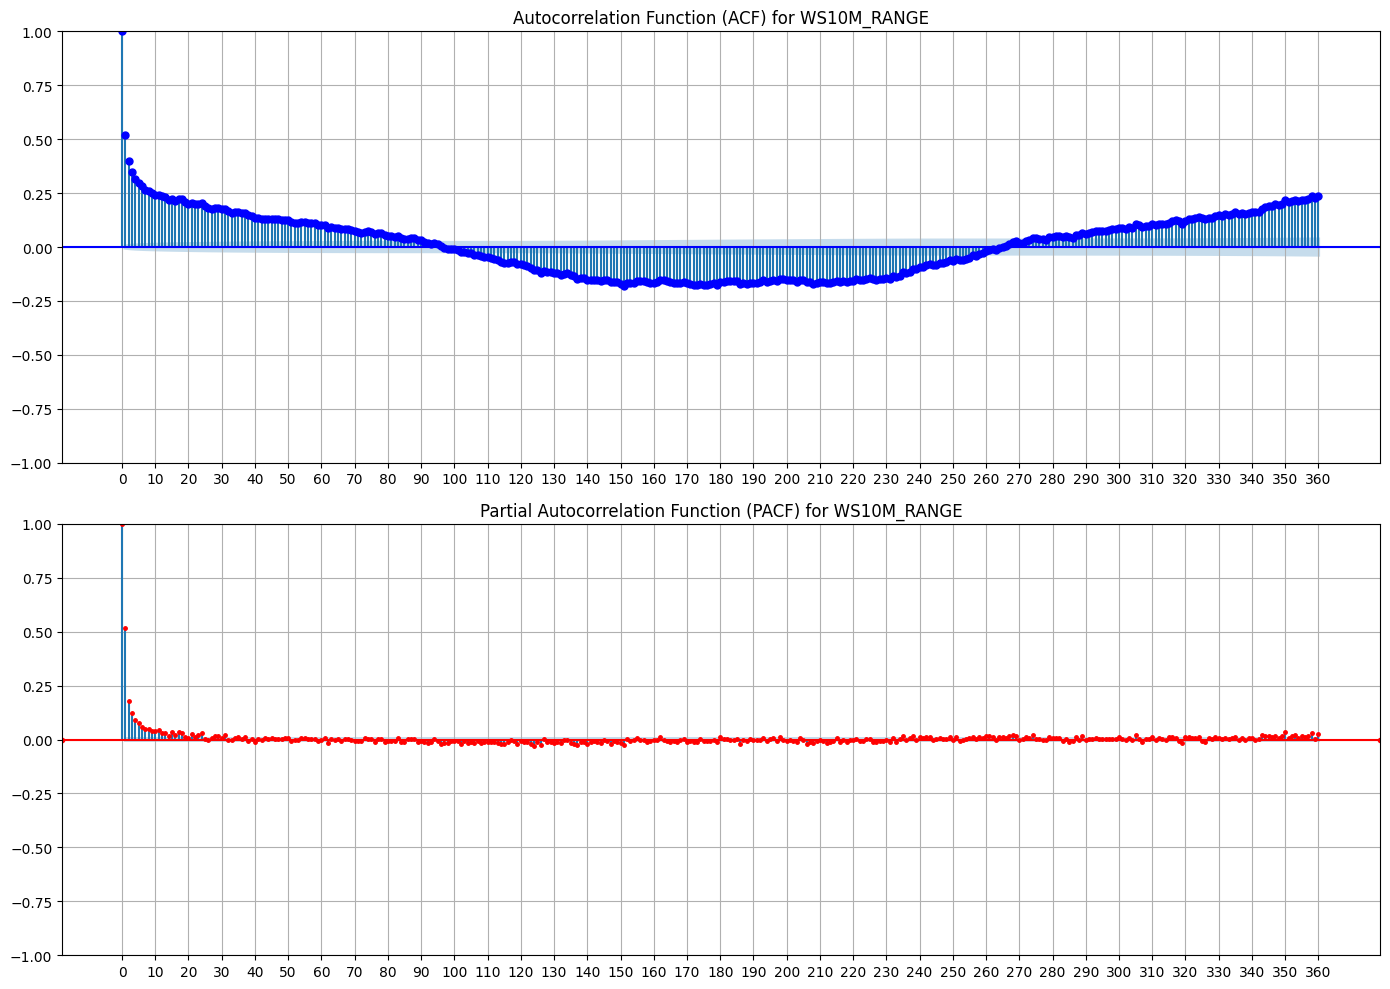

Analyzing WD10M series
ADF Statistic: -14.200423841033551
p-value: 1.7918269744198784e-26


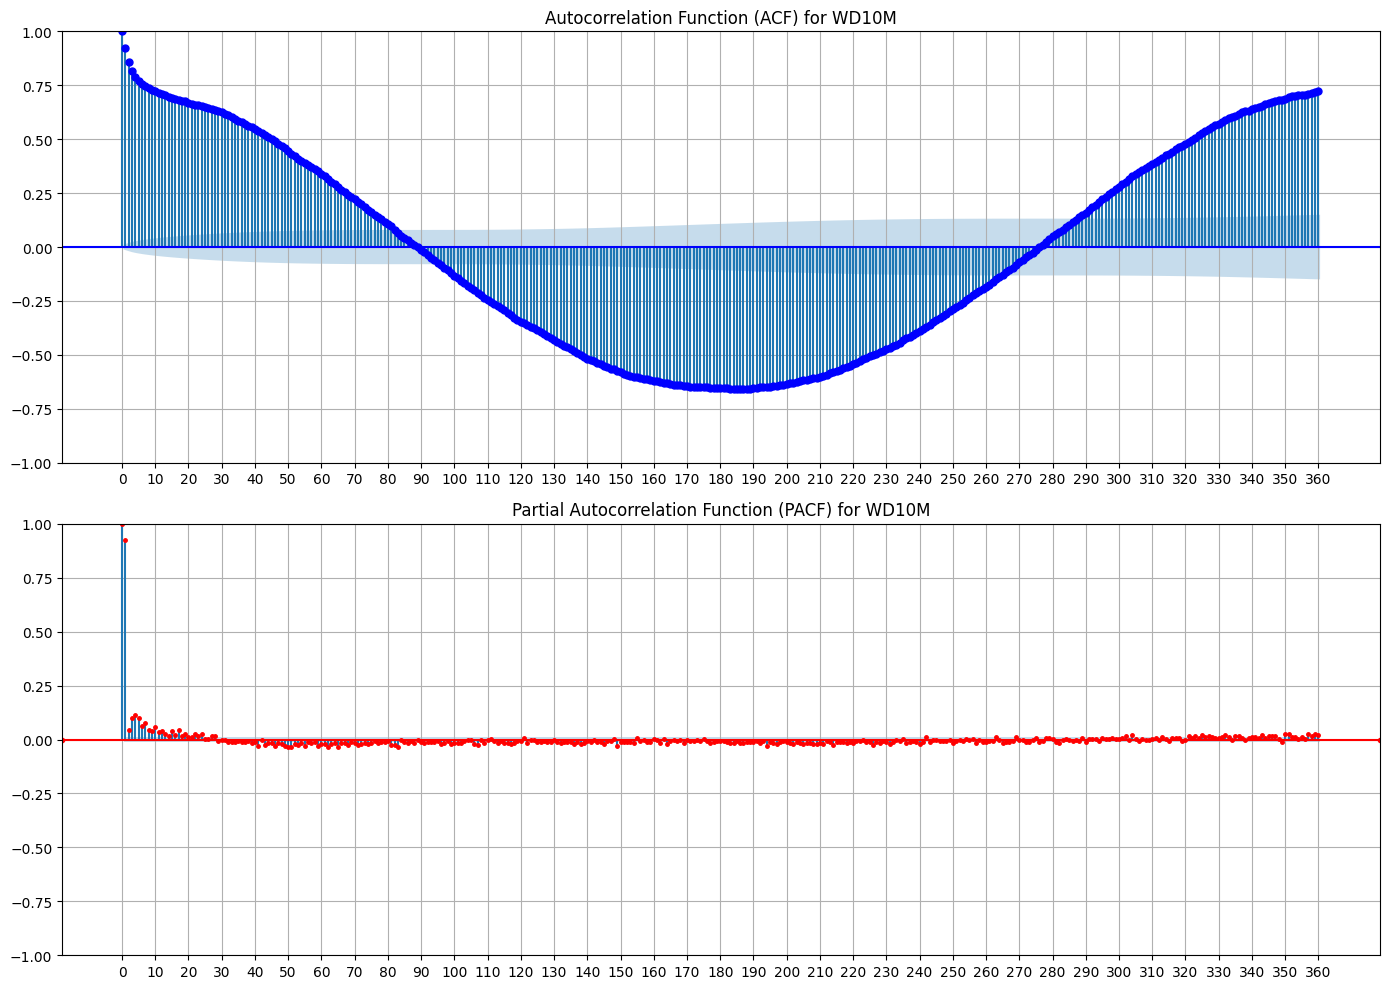

Analyzing PRECTOTCORR series
ADF Statistic: -19.486537138263373
p-value: 0.0


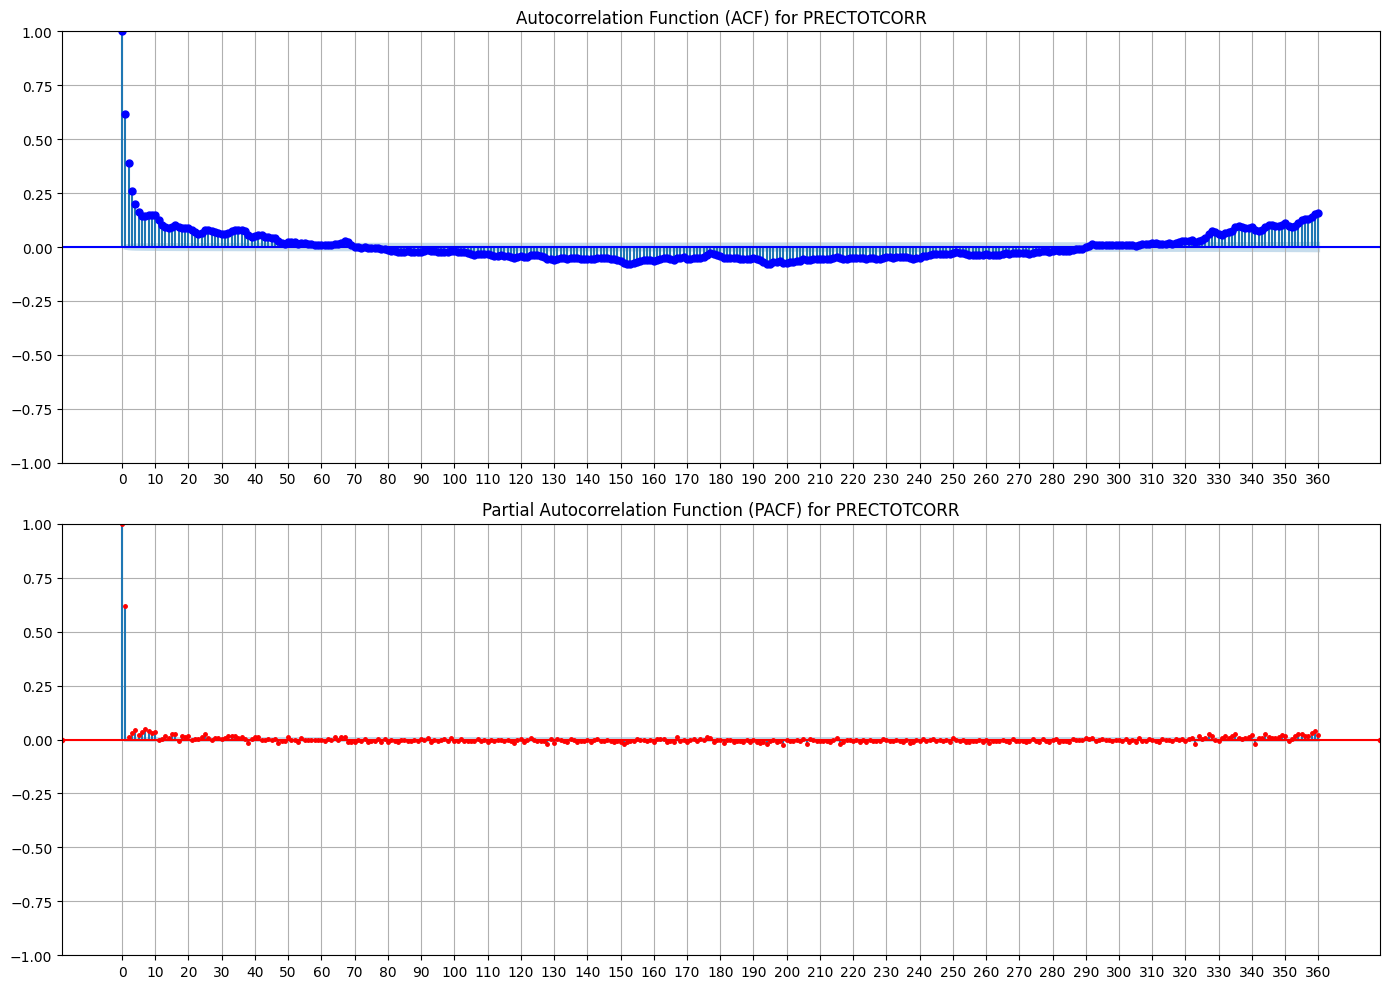

In [7]:
for i in d1.columns:
    analyze_series(data[i],i)

In [7]:
def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')
    return result[1] <= 0.05

In [8]:
def make_stationary(series):
    return series.diff().dropna()

In [9]:
df1=df_main.drop(columns=['Date','Latitude','Longitude'])

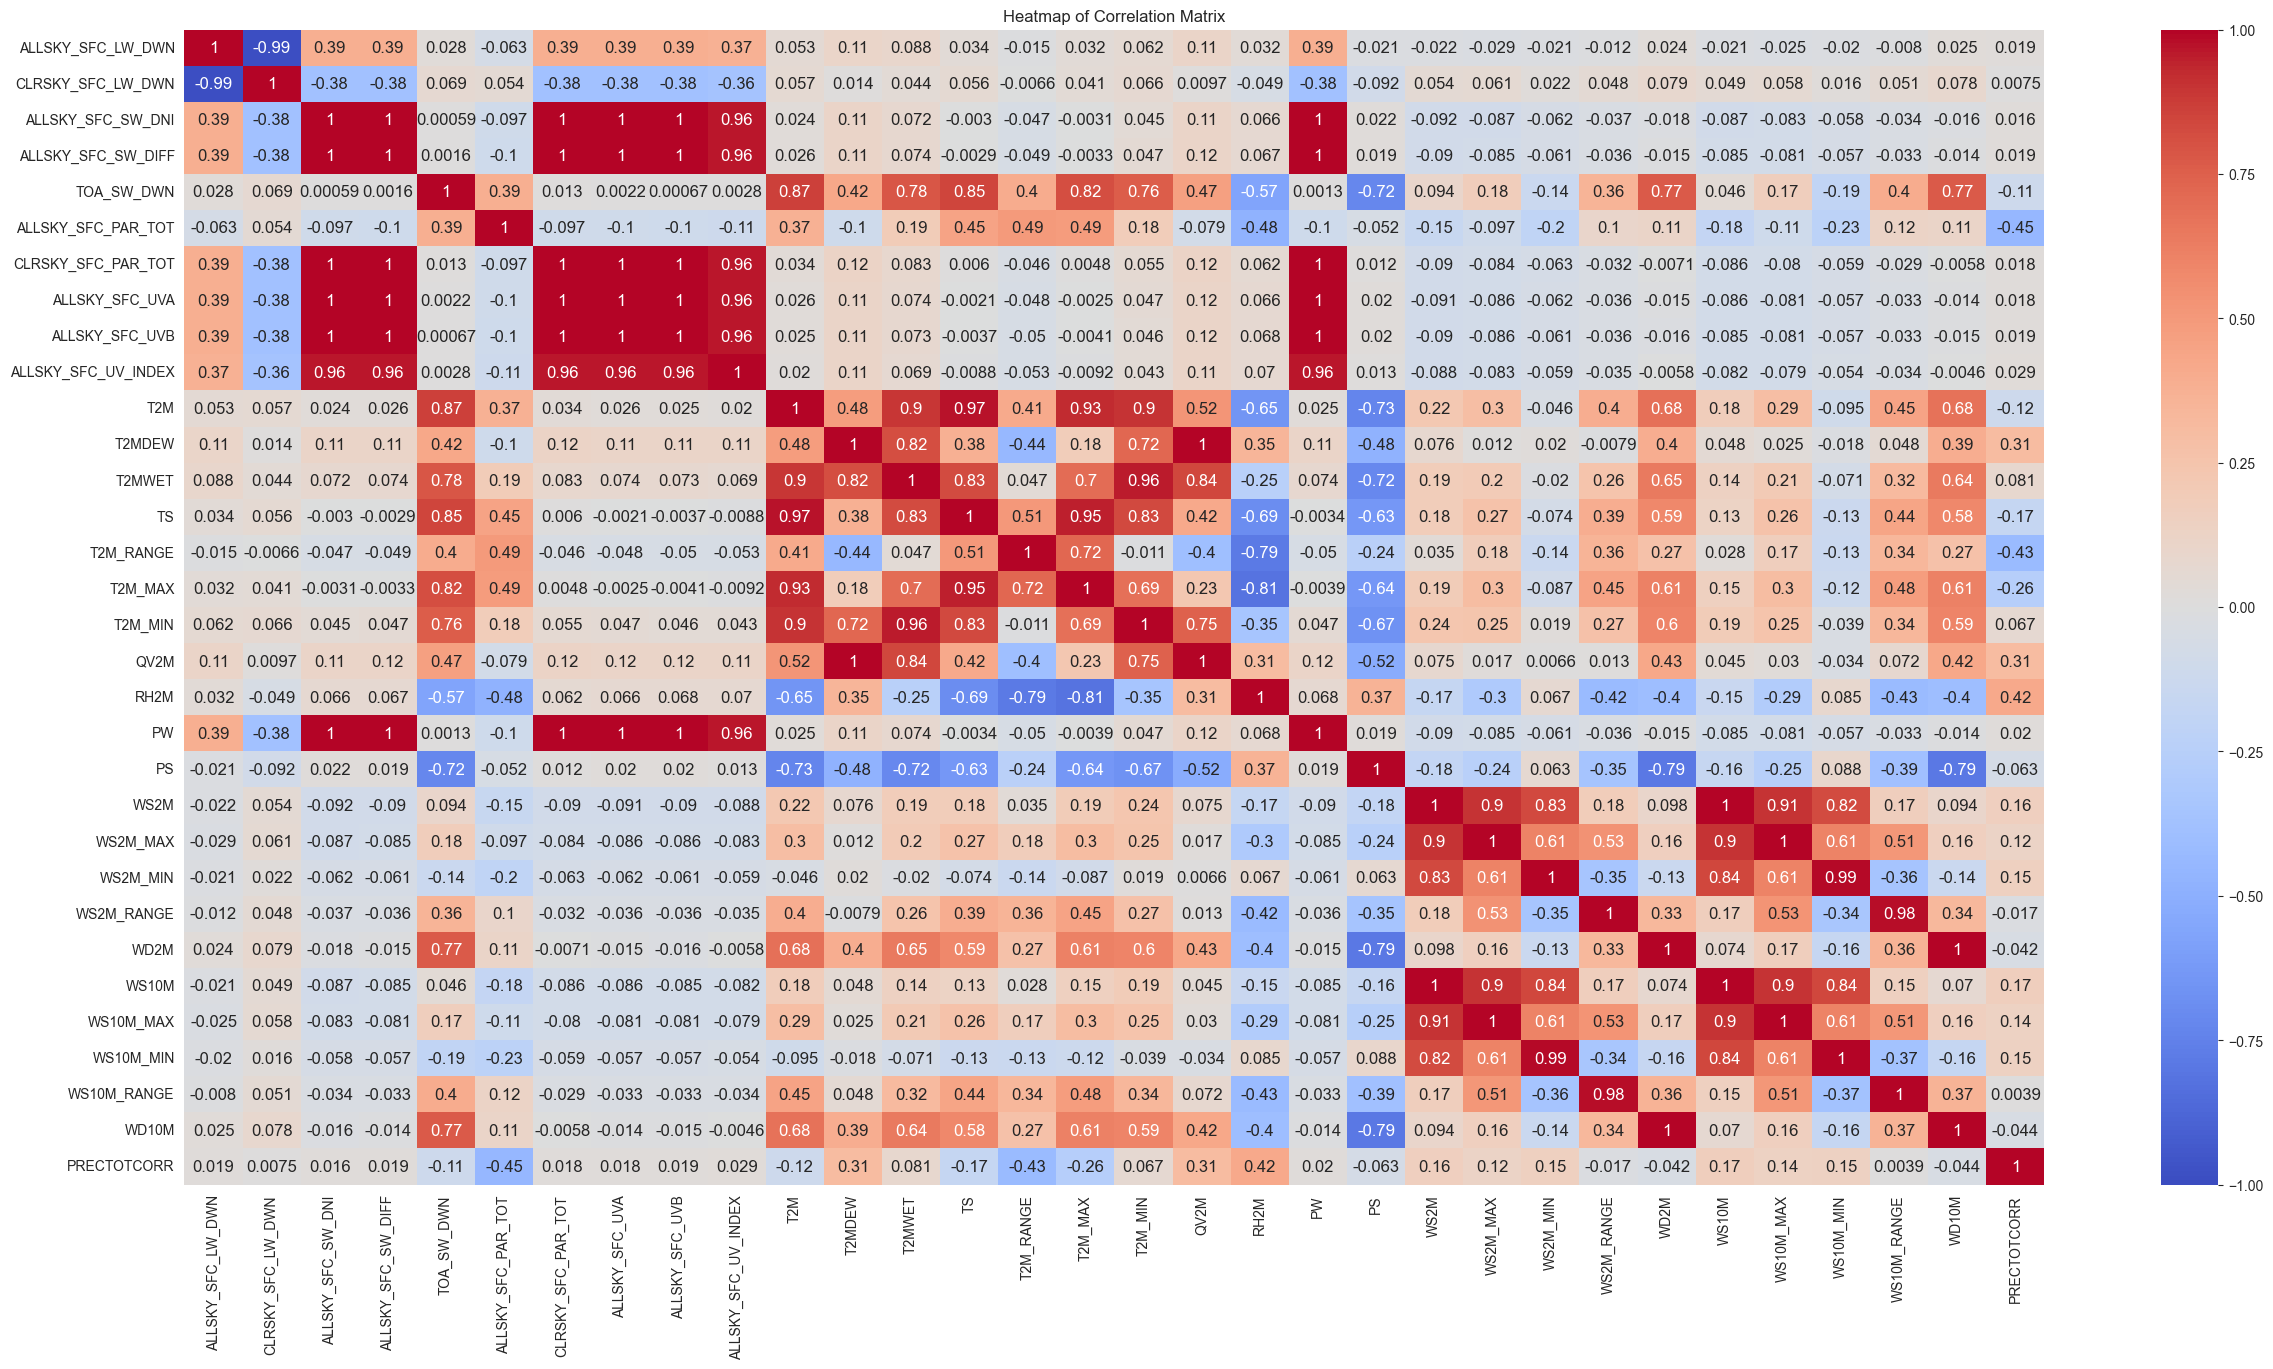

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(30,15))
corr_matrix = df1.corr()
# Plot the heatmap
sns.heatmap(corr_matrix, 
            annot=True,               # Add annotations (correlation values)
            cmap='coolwarm',          # Color map for the heatmap
            vmin=-1, vmax=1,          # Set the min and max correlation values
            annot_kws={"size": 12})   # Increase the font size of the annotations


plt.title('Heatmap of Correlation Matrix')
plt.show()

<Axes: xlabel='PRECTOTCORR'>

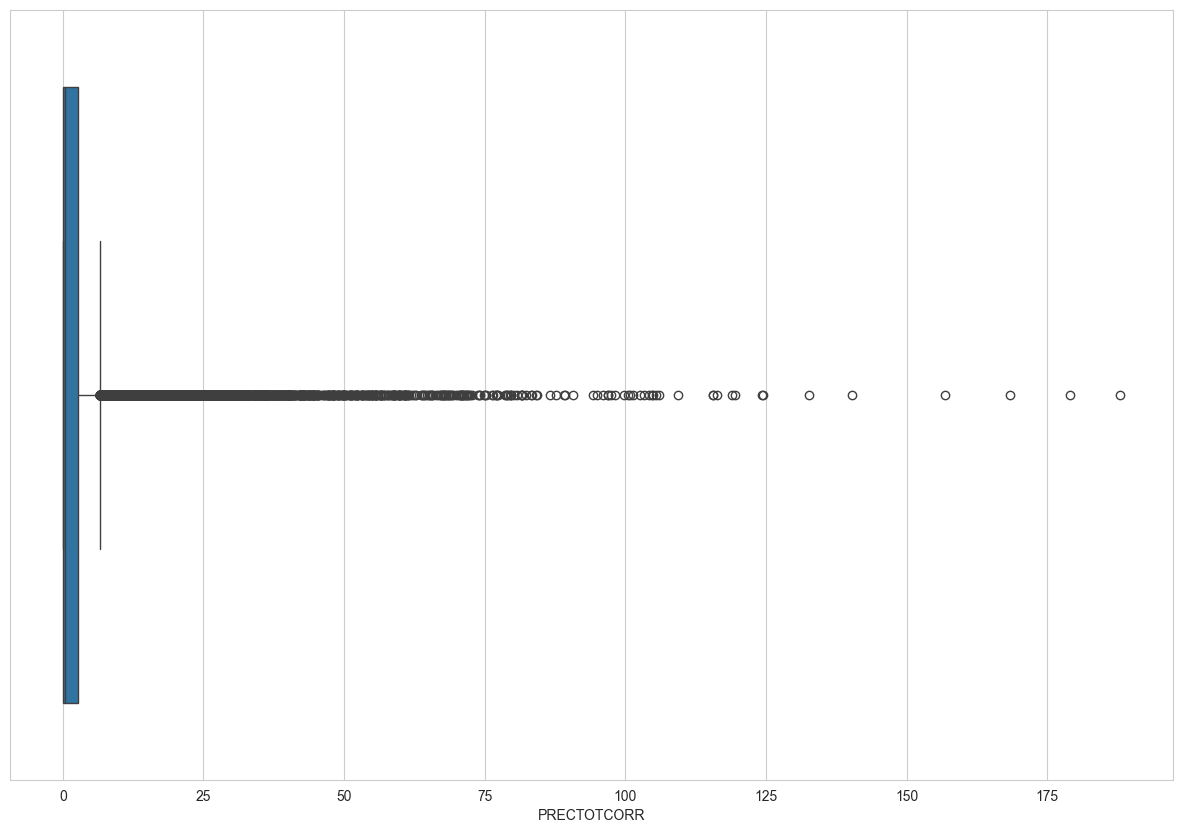

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(df_main.iloc[:,-1],orient='h')

<Axes: >

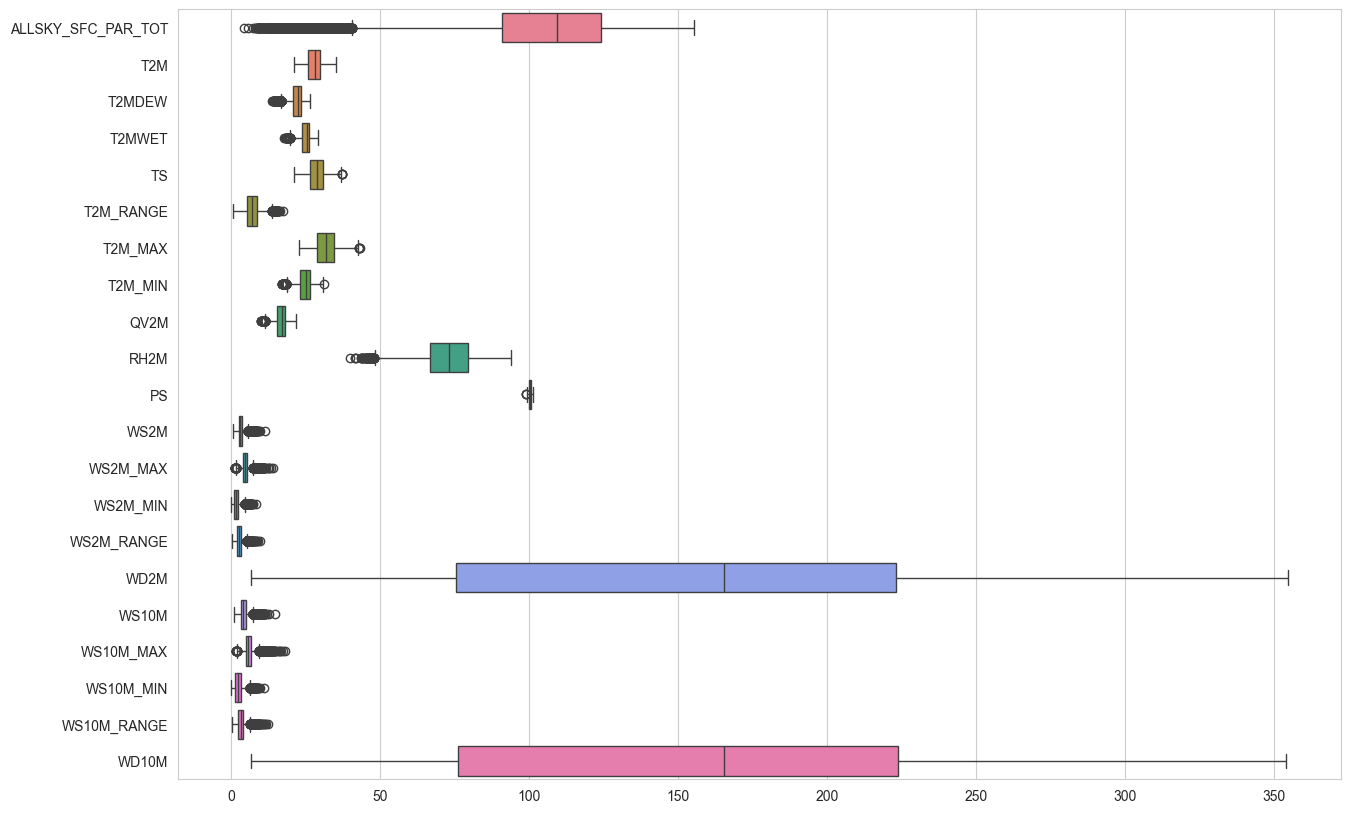

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(df_main.iloc[:,4:-1],orient='h')

In [ ]:
df_main['Date'] = pd.to_datetime(df_main['Date'], format='%Y%m%d')
df_main.set_index('Date', inplace=True)

In [31]:
def modeling(dd):
    y = dd['PRECTOTCORR']
    X = dd.drop(columns=['PRECTOTCORR'])
    
    train_size = int(len(y) * 0.8)
    train_y, test_y = y[:train_size], y[train_size:]
    train_X, test_X = X[:train_size], X[train_size:]

    model = SARIMAX(train_y, 
                    exog=train_X, 
                    order=(1,0, 1),        # ARIMA order: p, d, q
                    seasonal_order=(1, 1, 1,4),  # Seasonal order: P, D, Q, m (4 for monthly seasonality)
                    enforce_stationarity=False, 
                    enforce_invertibility=False)

    model_fit = model.fit(disp=False)
    pred = model_fit.get_forecast(steps=len(test_y), exog=test_X)
    pred_ci = pred.conf_int()

    plt.figure(figsize=(10,6))
    plt.plot(train_y.index, train_y, label='Training data')
    plt.plot(test_y.index, test_y, label='Test data', color='orange')
    plt.plot(test_y.index, pred.predicted_mean, label='Predictions', color='green')
    plt.fill_between(test_y.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.15)
    plt.legend()
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


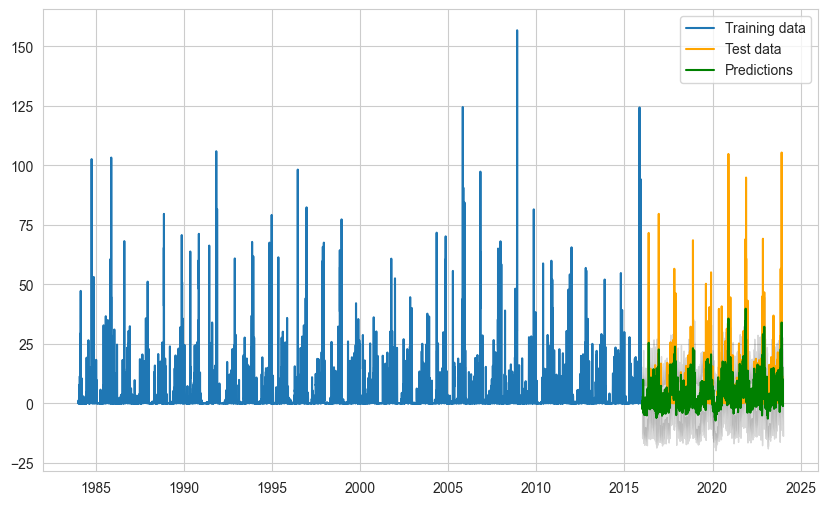

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


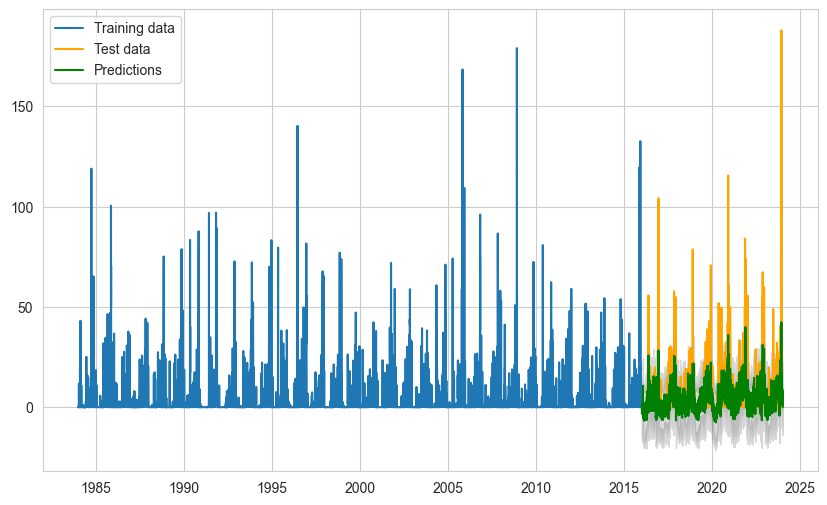

In [32]:
data_g= df_main.groupby(['Latitude', 'Longitude'])
for i,j in data_g:
    modeling(j)

In [26]:
df_main

Latitude  Longitude  TOA_SW_DWN  ALLSKY_SFC_PAR_TOT    T2M  T2MDEW  \
Date                                                                            
19840101  13.219032  80.017639       29.26               96.70  24.43   20.91   
19840102  13.219032  80.017639       29.30               94.90  24.02   20.51   
19840103  13.219032  80.017639       29.34               93.30  24.03   20.58   
19840104  13.219032  80.017639       29.39               96.40  24.16   20.54   
19840105  13.219032  80.017639       29.44               96.50  24.17   21.10   
...             ...        ...         ...                 ...    ...     ...   
20231228  12.719032  80.017639       29.70               93.30  25.65   22.95   
20231229  12.719032  80.017639       29.73               80.41  25.71   22.78   
20231230  12.719032  80.017639       29.75               99.37  24.94   21.26   
20231231  12.719032  80.017639       29.78               88.43  25.01   20.56   
20240101  12.719032  80.017639       29.82               97.79  24.84   20.44   

          T2MWET     TS  T2M_RANGE  T2M_MAX  ...  WS2M_MAX  WS2M_MIN  \
Date                                         ...                       
19840101   22.67  24.62       4.97    27.44  ...      4.93      2.62   
19840102   22.26  24.23       4.38    26.65  ...      2.47      1.61   
19840103   22.30  24.47       5.47    27.26  ...      4.41      1.55   
19840104   22.35  24.45       5.10    27.26  ...      4.82      2.15   
19840105   22.63  24.58       5.48    27.17  ...      4.77      1.92   
...          ...    ...        ...      ...  ...       ...       ...   
20231228   24.30  25.85       4.78    28.53  ...      5.56      3.85   
20231229   24.24  25.85       4.36    28.44  ...      5.70      3.88   
20231230   23.10  25.17       4.37    27.50  ...      4.84      3.13   
20231231   22.79  25.20       4.92    27.78  ...      4.09      2.54   
20240101   22.64  25.15       4.72    27.67  ...      4.19      2.54   

          WS2M_RANGE   WD2M  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WD10M  \
Date                                                                           
19840101        2.31  93.88   4.80       6.15       3.68         2.48  93.88   
19840102        0.87  99.44   2.86       3.48       2.06         1.42  99.81   
19840103        2.85  71.00   3.68       5.54       2.38         3.16  70.62   
19840104        2.68  64.00   4.30       5.98       3.15         2.84  63.31   
19840105        2.85  66.94   4.08       5.88       2.94         2.95  66.38   
...              ...    ...    ...        ...        ...          ...    ...   
20231228        1.71  33.44   5.93       7.02       5.02         2.00  32.88   
20231229        1.82  38.88   5.87       7.16       5.05         2.11  38.31   
20231230        1.70  40.38   5.06       6.05       4.21         1.84  40.00   
20231231        1.55  47.56   4.35       5.12       3.41         1.71  46.62   
20240101        1.65  38.62   4.09       5.22       3.48         1.74  38.19   

          PRECTOTCORR  
Date                   
19840101         0.01  
19840102         0.18  
19840103         0.01  
19840104         0.03  
19840105         0.06  
...               ...  
20231228         0.83  
20231229         0.75  
20231230         0.16  
20231231         0.14  
20240101         0.22  

[29222 rows x 25 columns]